<a href="https://colab.research.google.com/github/RAFS20/Big-Data-HDFS-Map-Reduce-Apache-Spark-Apache-Kafka/blob/main/Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Spark

Apuntes de Ricardo Alonzo Fernández Salguero

In [ ]:
pip install pyspark

In [ ]:
# Importar librerías necesarias
import matplotlib.pyplot as plt  # Importar la librería para visualización
from pyspark.sql import SparkSession  # Importar la clase SparkSession para crear una sesión de Spark
from pyspark.sql.functions import col, avg, sum, count, when, concat, substring, date_add, lit  # Importar funciones para operaciones en DataFrame
from pyspark.sql.types import StructType, StructField, StringType, FloatType, DateType  # Importar tipos de datos para definir el esquema
from pyspark.sql.window import Window  # Importar módulo para operaciones de ventana en DataFrame
from pyspark.sql.functions import row_number, rank  # Importar funciones para cálculos de ranking en DataFrame
from pyspark.sql.functions import expr  # Importar función expr para cálculos de expresiones
from pyspark.sql.functions import udf  # Importar función udf para definir funciones definidas por el usuario
from pyspark.sql.types import IntegerType  # Importar tipo de dato IntegerType

# Crear una sesión de Spark
spark = SparkSession.builder.appName("EjemplosSpark2").getOrCreate()


In [ ]:
# Ejemplo 1: Operaciones de Transformación y Filtrado

# Creamos una lista de tuplas, donde cada tupla representa el nombre y la edad de una persona.
data = [("Alice", 25), ("Bob", 30), ("Charlie", 22), ("David", 28), ("Bob", 25)]

# Definimos el esquema del DataFrame que vamos a crear.
schema = StructType([
    StructField("name", StringType(), True),
    StructField("age", IntegerType(), True)
])

# Creamos un DataFrame utilizando Spark, pasando los datos y el esquema definido.
df = spark.createDataFrame(data, schema)

# Realizamos una transformación en el DataFrame, agregando una nueva columna "age_plus_2" que contiene la edad aumentada en 2.
transformed_df = df.withColumn("age_plus_2", col("age") + 2)

# Realizamos un filtrado en el DataFrame para seleccionar las filas donde la edad está entre 25 y 30.
filtered_df = df.filter((col("age") >= 25) & (col("age") <= 30))


# Visualización 1: Resultado del DataFrame transformado
transformed_df.show()
filtered_df.show()

+-------+---+----------+
|   name|age|age_plus_2|
+-------+---+----------+
|  Alice| 25|        27|
|    Bob| 30|        32|
|Charlie| 22|        24|
|  David| 28|        30|
|    Bob| 25|        27|
+-------+---+----------+

+-----+---+
| name|age|
+-----+---+
|Alice| 25|
|  Bob| 30|
|David| 28|
|  Bob| 25|
+-----+---+



In [ ]:
# Ejemplo 2: Operaciones de Agrupación y Agregación

# Realizamos una operación de agrupación en el DataFrame `df` usando el atributo "name".
# Luego aplicamos diferentes funciones de agregación: promedio de edad, suma de edades y conteo total de filas.
grouped_df = df.groupBy("name").agg(avg("age"), sum("age"), count("*"))
#grouped_df = df.groupBy(("name"), ("SegundaAgrup")).agg(avg("age"), sum("age"), count("*"))

# Visualización 2: Resultado del DataFrame agrupado
grouped_df.show()

+-------+--------+--------+--------+
|   name|avg(age)|sum(age)|count(1)|
+-------+--------+--------+--------+
|    Bob|    27.5|      55|       2|
|  Alice|    25.0|      25|       1|
|Charlie|    22.0|      22|       1|
|  David|    28.0|      28|       1|
+-------+--------+--------+--------+



In [ ]:
# Ejemplo 3: Joins y Uniones
data1 = [("Alice", 25), ("Bob", 30)]
data2 = [("Alice", 27), ("David", 28)]

# Definimos el esquema del DataFrame que vamos a crear.
schema = StructType([
    StructField("name", StringType(), True),
    StructField("age", IntegerType(), True)
])
# Creamos dos DataFrames, df1 y df2, utilizando Spark y los datos y el esquema definidos.
df1 = spark.createDataFrame(data1, schema)
df2 = spark.createDataFrame(data2, schema)
# Realizar el join especificando alias para las columnas de cada DataFrame
# Unimos los DataFrames df1 y df2 utilizando la columna "name" como clave de unión y
# especificamos un alias para cada DataFrame.
joined_df = df1.alias("df1").join(df2.alias("df2"), on="name", how="inner")
# Realizar la unión de DataFrames
unioned_df = df1.union(df2)

# Visualización 3a: Resultado del DataFrame después del join
print("Resultado del DataFrame después del join:")
joined_df.show()

# Visualización 3b: Resultado del DataFrame después de la unión
print("Resultado del DataFrame después de la unión:")
unioned_df.show()



Resultado del DataFrame después del join:
+-----+---+---+
| name|age|age|
+-----+---+---+
|Alice| 25| 27|
+-----+---+---+

Resultado del DataFrame después de la unión:
+-----+---+
| name|age|
+-----+---+
|Alice| 25|
|  Bob| 30|
|Alice| 27|
|David| 28|
+-----+---+



In [ ]:
# Ejemplo 4: Operaciones de Ventana

# Importar las funciones y clases necesarias de la librería PySpark
from pyspark.sql.window import Window
from pyspark.sql.functions import rank, row_number, col

# Crear una especificación de ventana utilizando la función Window.orderBy
window_spec = Window.orderBy(col("age"))

# Aplicar una operación de ventana utilizando la función rank() y withColumn()
# La función rank() asigna un rango a cada fila basado en el orden definido por la ventana
ranked_df = df.withColumn("rank", rank().over(window_spec))

# Aplicar otra operación de ventana utilizando la función row_number() y withColumn()
# La función row_number() asigna un número de fila basado en el orden definido por la ventana
row_numbered_df = df.withColumn("row_number", row_number().over(window_spec))

# Visualización 4: Resultado del DataFrame con columnas de ventana

# Mostrar el DataFrame resultante con las columnas de ventana "rank"
ranked_df.show()
row_numbered_df.show()


+-------+---+----+
|   name|age|rank|
+-------+---+----+
|Charlie| 22|   1|
|  Alice| 25|   2|
|    Bob| 25|   2|
|  David| 28|   4|
|    Bob| 30|   5|
+-------+---+----+

+-------+---+----------+
|   name|age|row_number|
+-------+---+----------+
|Charlie| 22|         1|
|  Alice| 25|         2|
|    Bob| 25|         3|
|  David| 28|         4|
|    Bob| 30|         5|
+-------+---+----------+



In [ ]:
# Ejemplo 5: Manejo de Datos Faltantes

# Importar las clases necesarias de la librería PySpark
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
from pyspark.sql import SparkSession

# Crear una sesión de Spark
spark = SparkSession.builder.appName("Ejemplo5").getOrCreate()

# Definir los datos y el esquema para el DataFrame
data = [("Alice", 25), ("Bob", None), ("Charlie", 22), ("David", None)]
schema = StructType([
    StructField("name", StringType(), True),
    StructField("age", IntegerType(), True)
])

# Crear un DataFrame a partir de los datos y el esquema
df = spark.createDataFrame(data, schema)

# Aplicar el método fillna() para llenar los valores faltantes en la columna "age" con el valor 0
filled_df = df.fillna({"age": 23})

# Visualización 5: Resultado del DataFrame con valores faltantes llenados
filled_df.show()


+-------+---+
|   name|age|
+-------+---+
|  Alice| 25|
|    Bob| 23|
|Charlie| 22|
|  David| 23|
+-------+---+



In [ ]:
# Ejemplo 6: Operaciones de Strings

# Importar las clases necesarias de la librería PySpark
from pyspark.sql.types import StructType, StructField, StringType
from pyspark.sql.functions import concat, col, lit, substring
from pyspark.sql import SparkSession

# Crear una sesión de Spark
spark = SparkSession.builder.appName("Ejemplo6").getOrCreate()

# Definir los datos y el esquema para el DataFrame
data = [("Alice", "Smith"), ("Bob", "Johnson")]
schema = StructType([
    StructField("first_name", StringType(), True),
    StructField("last_name", StringType(), True)
])

# Crear un DataFrame a partir de los datos y el esquema
df = spark.createDataFrame(data, schema)

# Aplicar la función concat() para combinar las columnas "first_name" y "last_name"
# y agregar el resultado como una nueva columna llamada "full_name"
concatenated_df = df.withColumn("full_name", concat(col("first_name"), lit(" "), col("last_name")))

# Aplicar la función substring() para extraer los primeros dos caracteres de la columna "first_name"
# y agregar el resultado como una nueva columna llamada "short_name"
substring_df = df.withColumn("short_name", substring(col("first_name"), 1, 3))

# Visualización 6: Resultado del DataFrame con columnas de strings manipulados
concatenated_df.show()
substring_df.show()


+----------+---------+-----------+
|first_name|last_name|  full_name|
+----------+---------+-----------+
|     Alice|    Smith|Alice Smith|
|       Bob|  Johnson|Bob Johnson|
+----------+---------+-----------+

+----------+---------+----------+
|first_name|last_name|short_name|
+----------+---------+----------+
|     Alice|    Smith|       Ali|
|       Bob|  Johnson|       Bob|
+----------+---------+----------+



In [ ]:
# Ejemplo 7: Operaciones de Fecha y Hora

# Importar las clases y funciones necesarias de la librería PySpark
from pyspark.sql.functions import current_date, date_add
from pyspark.sql.types import StructType, StructField, StringType
from pyspark.sql import SparkSession

# Crear una sesión de Spark
spark = SparkSession.builder.appName("Ejemplo7").getOrCreate()

# Definir los datos y el esquema para el DataFrame
data = [("Alice", "2021-01-15"), ("Bob", "2022-05-20")]
schema = StructType([
    StructField("name", StringType(), True),
    StructField("birth_date", StringType(), True)
])

# Crear un DataFrame a partir de los datos y el esquema
df = spark.createDataFrame(data, schema)

# Aplicar la función current_date() para obtener la fecha actual
# y la función date_add() para agregar 10 días a la fecha actual
# Agregar el resultado como una nueva columna llamada "future_date"
date_added_df = df.withColumn("future_date", date_add(current_date(), 10))

# Visualización 7: Resultado del DataFrame con fechas futuras agregadas
date_added_df.show()


+-----+----------+-----------+
| name|birth_date|future_date|
+-----+----------+-----------+
|Alice|2021-01-15| 2023-12-06|
|  Bob|2022-05-20| 2023-12-06|
+-----+----------+-----------+



In [ ]:
# Ejemplo 8: Uso de UDFs (User Defined Functions)

# Importar las clases y funciones necesarias de la librería PySpark
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
from pyspark.sql.functions import udf, col
from pyspark.sql import SparkSession

# Crear una sesión de Spark
spark = SparkSession.builder.appName("Ejemplo8").getOrCreate()

# Definir los datos y el esquema para el DataFrame
data = [("Alice", 25), ("Bob", 30), ("Charlie", 22), ("Daniel", 52)]
schema = StructType([
    StructField("name", StringType(), True),
    StructField("age", IntegerType(), True)
])

# Crear un DataFrame a partir de los datos y el esquema
df = spark.createDataFrame(data, schema)

# Definir una función personalizada (UDF) para categorizar las edades en grupos
def categorize_age(age):
    if age < 25:
        return "Young"
    elif age >= 25 and age <= 30:
        return "Middle-aged"
    else:
        return "Elderly"

# Crear un UDF utilizando la función personalizada y el tipo de dato de retorno (StringType())
categorize_udf = udf(categorize_age, StringType())

# Aplicar el UDF a la columna "age" del DataFrame y agregar el resultado como una nueva columna "age_category"
categorized_df = df.withColumn("age_category", categorize_udf(col("age")))

# Visualización 8: Resultado del DataFrame con categorías de edad agregadas
categorized_df.show()


+-------+---+------------+
|   name|age|age_category|
+-------+---+------------+
|  Alice| 25| Middle-aged|
|    Bob| 30| Middle-aged|
|Charlie| 22|       Young|
| Daniel| 52|     Elderly|
+-------+---+------------+



In [ ]:
# Ejemplo 9: Optimización de Consultas

# Importar las clases y funciones necesarias de la librería PySpark
from pyspark.sql.types import StructType, StructField, StringType
from pyspark.sql import SparkSession

# Crear una sesión de Spark
spark = SparkSession.builder.appName("Ejemplo9").getOrCreate()

# Definir los datos y el esquema para el DataFrame
data = [("Alice", 25), ("Bob", 30), ("Charlie", 22), ("Charlie", 22), ("Bob", 30)]
schema = StructType([
    StructField("name", StringType(), True),
    StructField("age", IntegerType(), True)
])

# Crear un DataFrame a partir de los datos y el esquema
df = spark.createDataFrame(data, schema)

# Aplicar la optimización de consulta seleccionando una columna y eliminando duplicados
optimized_df = df.select("name").distinct()

# Visualización 9: Resultado del DataFrame con columnas seleccionadas y distinción
optimized_df.show()


+-------+
|   name|
+-------+
|    Bob|
|  Alice|
|Charlie|
+-------+



In [ ]:
# Ejemplo 10: Escritura y Lectura de Datos

# Importar las clases y funciones necesarias de la librería PySpark
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
from pyspark.sql import SparkSession

# Crear una sesión de Spark
spark = SparkSession.builder.appName("Ejemplo10").getOrCreate()

# Definir los datos y el esquema para el DataFrame
data = [("Alice", 25), ("Bob", 30), ("Charlie", 22)]
schema = StructType([
    StructField("name", StringType(), True),
    StructField("age", IntegerType(), True)
])

# Crear un DataFrame a partir de los datos y el esquema
df = spark.createDataFrame(data, schema)

# Escribir el DataFrame en formato Parquet en el sistema de archivos
df.write.mode("overwrite").parquet("data.parquet")

# Leer el DataFrame desde el archivo Parquet
loaded_df = spark.read.parquet("data.parquet")

# Visualización 10: Resultado de los datos escritos y leídos
loaded_df.show()

+-------+---+
|   name|age|
+-------+---+
|  Alice| 25|
|    Bob| 30|
|Charlie| 22|
+-------+---+



In [ ]:
# Ejemplo 11: Particionamiento y Distribución de Datos

# Importar las clases y funciones necesarias de la librería PySpark
from pyspark.sql.types import StructType, StructField, StringType
from pyspark.sql import SparkSession

# Crear una sesión de Spark
spark = SparkSession.builder.appName("Ejemplo11").getOrCreate()

# Definir los datos y el esquema para el DataFrame
data = [("Alice", 25), ("Bob", 30), ("Charlie", 22)]
schema = StructType([
    StructField("name", StringType(), True),
    StructField("age", IntegerType(), True)
])

# Crear un DataFrame a partir de los datos y el esquema
df = spark.createDataFrame(data, schema)

# Realizar el particionamiento del DataFrame en 4 particiones basado en la columna "name"
partitioned_df = df.repartition(4, "name")

# Realizar la coalescencia del DataFrame a 2 particiones
distributed_df = df.coalesce(2)

# Visualización 11: Número de particiones en el DataFrame particionado
print("Número de particiones en DataFrame particionado:", partitioned_df.rdd.getNumPartitions())


Número de particiones en DataFrame particionado: 4


In [ ]:
# Ejemplo 12: Trabajo con Grandes Volúmenes de Datos

# Importar las clases y funciones necesarias de la librería PySpark
from pyspark.sql import SparkSession

# Crear una sesión de Spark
spark = SparkSession.builder.appName("Ejemplo12").getOrCreate()

# Generar un DataFrame con un gran volumen de datos utilizando la función range()
large_data_df = spark.range(0, 100000000000)

# Calcular la suma total de los valores en la columna "id" del DataFrame utilizando selectExpr()
sum_result = large_data_df.selectExpr("sum(id)").collect()[0][0]

# Visualización 12: Suma total de los valores en el DataFrame de datos grandes
print("Suma total:", sum_result)

Suma total: 932355974711512064


In [ ]:
# Ejemplo 13: Expresiones SQL y Consultas Complejas

# Importar las clases y funciones necesarias de la librería PySpark
from pyspark.sql import SparkSession

# Crear una sesión de Spark
spark = SparkSession.builder.appName("Ejemplo13").getOrCreate()

# Crear un DataFrame llamado "df" con datos de personas y sus edades
data = [("Alice", 25), ("Bob", 30), ("Charlie", 22)]
schema = StructType([
    StructField("name", StringType(), True),
    StructField("age", IntegerType(), True)
])
df = spark.createDataFrame(data, schema)

# Crear una vista temporal "people" a partir del DataFrame "df"
df.createOrReplaceTempView("people")

# Realizar una consulta SQL en el DataFrame utilizando spark.sql()
query_result = spark.sql("SELECT name, age FROM people WHERE age >= 25")

# Visualización 13: Resultado de la consulta SQL
query_result.show()

+-----+---+
| name|age|
+-----+---+
|Alice| 25|
|  Bob| 30|
+-----+---+



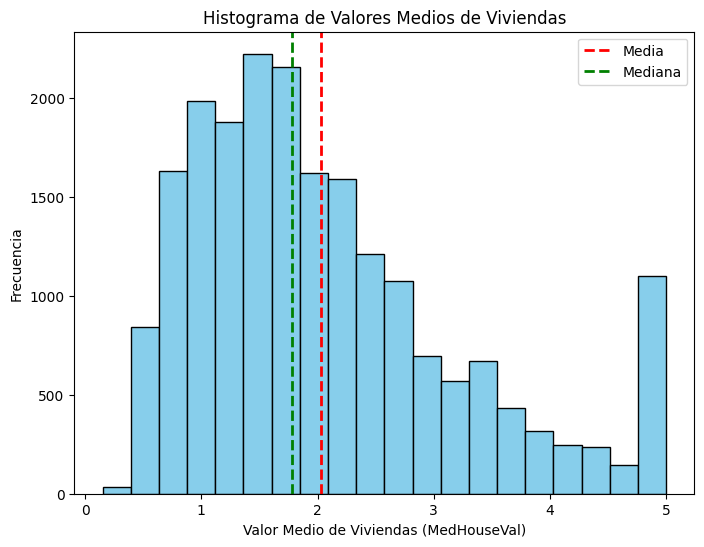

In [ ]:
# Instalar PySpark en Google Colab
!pip install pyspark

# Importar librerías necesarias
from pyspark.sql import SparkSession  # Importar la clase SparkSession para crear una sesión de Spark
from pyspark.sql.functions import col, avg, median  # Importar funciones para operaciones en DataFrame
from pyspark.sql.types import StructType, StructField, FloatType  # Importar tipos de datos para definir el esquema
import matplotlib.pyplot as plt  # Importar la librería para visualización
from sklearn.datasets import fetch_california_housing  # Importar el conjunto de datos California housing

# Crear una sesión de Spark
spark = SparkSession.builder.appName("EjemplosSpark1").getOrCreate()

# Cargar el conjunto de datos California housing
california = fetch_california_housing()  # Obtener el conjunto de datos California housing
data = [(float(california.data[i][0]), float(california.target[i])) for i in range(len(california.data))]
# Crear una lista de tuplas con valores relevantes
schema = StructType([  # Definir el esquema del DataFrame
    StructField("MedInc", FloatType(), True),  # Columna "MedInc" con tipo de dato FloatType
    StructField("MedHouseVal", FloatType(), True)  # Columna "MedHouseVal" con tipo de dato FloatType
])
df = spark.createDataFrame(data, schema)  # Crear un DataFrame con los datos y el esquema

# Ejemplo: Filtrar registros en función de ciertos criterios
filtered_df = df.filter(col("MedInc") < 10)  # Filtrar registros donde "MedInc" es menor que 10

# Calcular estadísticas descriptivas
stats = filtered_df.describe().toPandas()  # Calcular estadísticas y convertirlas a DataFrame de Pandas
average_medval = float(stats.loc[1, "MedHouseVal"])  # Extraer el valor promedio de "MedHouseVal"
median_medval = float(filtered_df.select(median("MedHouseVal")).first()[0])  # Extraer la mediana de "MedHouseVal"

# Visualización: Histograma de valores medios de viviendas (MedHouseVal)
medval_values = df.select("MedHouseVal").rdd.flatMap(lambda x: x).collect()  # Extraer valores de "MedHouseVal" y convertir a lista
plt.figure(figsize=(8, 6))  # Crear una figura para la visualización
plt.hist(medval_values, bins=20, color='skyblue', edgecolor='black')  # Crear un histograma de los valores con opciones de estilo
plt.title("Histograma de Valores Medios de Viviendas")  # Establecer título del gráfico
plt.xlabel("Valor Medio de Viviendas (MedHouseVal)")  # Etiqueta del eje x
plt.ylabel("Frecuencia")  # Etiqueta del eje y
plt.axvline(average_medval, color='red', linestyle='dashed', linewidth=2, label='Media')  # Agregar línea punteada roja para la media
plt.axvline(median_medval, color='green', linestyle='dashed', linewidth=2, label='Mediana')  # Agregar línea punteada verde para la mediana
plt.legend()  # Mostrar leyenda
plt.show()  # Mostrar la visualización



### Linear Regression

### Costo de Regresión Lineal

En regresión lineal, el objetivo es encontrar los coeficientes $\beta_0, \beta_1, \ldots, \beta_p$ que minimicen la diferencia entre las predicciones del modelo y los valores reales de la variable objetivo. Esto se logra al minimizar la suma de los cuadrados de los errores (método de los mínimos cuadrados ordinarios). La función de costo se define como:

$$
\text{Costo} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Donde:
- $n$ es el número de ejemplos en el conjunto de datos.
- $y_i$ es el valor real de la variable objetivo para el i-ésimo ejemplo.
- $\hat{y}_i$ es la predicción del modelo para el i-ésimo ejemplo.

La predicción $\hat{y}_i$ se calcula utilizando la ecuación de regresión lineal:

$$
\hat{y}_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \ldots + \beta_p x_{ip}
$$

Donde $x_{i1}, x_{i2}, \ldots, x_{ip}$ son las características del i-ésimo ejemplo.

El costo se interpreta como la suma de los cuadrados de las diferencias entre las predicciones y los valores reales. Al minimizar esta función de costo, los coeficientes $\beta_0, \beta_1, \ldots, \beta_p$ se ajustan para que las predicciones del modelo se acerquen lo más posible a los valores reales de la variable objetivo.

El objetivo de la regresión lineal es encontrar los valores óptimos de los coeficientes que minimizan este costo, lo que resulta en una mejor aproximación de la relación lineal entre las características y la variable objetivo en el conjunto de datos.

### Ridge Regression



### Costo de Regresión Ridge

En la regresión Ridge, se agrega un término de regularización $L2$ a la función de costo de regresión lineal. La función de costo se define como la suma de los cuadrados de las diferencias entre las predicciones del modelo y los valores reales, más un término de regularización $L2$:

$$
\text{Costo} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} \beta_j^2
$$

Donde:
- $n$ es el número de ejemplos en el conjunto de datos.
- $y_i$ es el valor real de la variable objetivo para el i-ésimo ejemplo.
- $\hat{y}_i$ es la predicción del modelo para el i-ésimo ejemplo.
- $p$ es el número de características en el conjunto de datos.
- $\beta_j$ son los coeficientes de regresión para la característica $j$.
- $\lambda$ (lambda) es el parámetro de regularización que controla la intensidad de la regularización $L2$.

El término de regularización $L2$ ($\lambda \sum_{j=1}^{p} \beta_j^2$) penaliza los coeficientes de regresión $\beta_j$ por ser grandes. A medida que $\lambda$ aumenta, el efecto de la penalización también aumenta, lo que resulta en coeficientes más pequeños.

El objetivo es encontrar los coeficientes $\beta_0, \beta_1, \ldots, \beta_p$ que minimizan esta función de costo. Al minimizar la suma de los cuadrados de las diferencias entre las predicciones y los valores reales y al agregar la penalización de la regularización $L2$, se logra un equilibrio entre ajustar los coeficientes a los datos y mantenerlos pequeños para evitar el sobreajuste.

La regularización Ridge es especialmente útil cuando hay multicolinealidad entre las características, ya que ayuda a estabilizar y mejorar las estimaciones de los coeficientes.

### Lasso Regression

### Costo de Regresión Lasso

En la regresión Lasso, además de minimizar la diferencia entre las predicciones del modelo y los valores reales de la variable objetivo, se agrega un término de regularización $L1$ a la función de costo. El término $L1$ ayuda a inducir la dispersión de los coeficientes y puede resultar en la selección automática de características. La función de costo se define como:

$$
\text{Costo} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |\beta_j|
$$

Donde:
- $n$ es el número de ejemplos en el conjunto de datos.
- $y_i$ es el valor real de la variable objetivo para el i-ésimo ejemplo.
- $\hat{y}_i$ es la predicción del modelo para el i-ésimo ejemplo.
- $p$ es el número de características en el conjunto de datos.
- $\beta_j$ son los coeficientes de regresión para la característica $j$.
- $\lambda$ (lambda) es el parámetro de regularización que controla la intensidad de la regularización $L1$.

El término de regularización $L1$ ($\lambda \sum_{j=1}^{p} |\beta_j|$) penaliza los coeficientes de regresión $\beta_j$ por su magnitud absoluta. A diferencia de la regularización Ridge, la regularización Lasso tiende a reducir algunos coeficientes a cero. Esto puede llevar a la selección automática de características, ya que las características menos importantes pueden tener coeficientes reducidos a cero.

El objetivo es encontrar los coeficientes $\beta_0, \beta_1, \ldots, \beta_p$ que minimizan esta función de costo. Al minimizar la suma de los cuadrados de las diferencias entre las predicciones y los valores reales y al agregar la penalización de la regularización $L1$, se logra un equilibrio entre ajustar los coeficientes a los datos y promover la dispersión y la selección de características.

La regresión Lasso es especialmente útil cuando se sospecha que muchas de las características pueden no ser relevantes para el modelo, ya que puede ayudar a reducir el número de características en el modelo final.




###Gradient Boosted Trees

Gradient Boosted Trees para regresión es un proceso iterativo que construye un modelo de regresión mejorando gradualmente las predicciones al ajustar árboles a los residuales del modelo anterior y ponderar sus contribuciones.


Supongamos que tenemos un conjunto de datos de entrenamiento $D = \{(x_i, y_i)\}_{i=1}^n$, donde $x_i$ es el vector de características de la muestra $i$, y $y_i$ es la etiqueta de regresión correspondiente. Queremos construir un modelo de regresión $F(x)$ que pueda predecir valores $y$ para nuevos puntos $x$.

El objetivo del algoritmo GBT es construir $F(x)$ como una suma ponderada de árboles de decisión débiles $T$, donde cada árbol intenta corregir los errores residuales del modelo anterior. La idea es minimizar el error residual en cada etapa para mejorar gradualmente las predicciones.

La formulación matemática de GBT para regresión se puede expresar de la siguiente manera:

1. Inicialización:
   - Inicializamos $F_0(x)$ como un valor constante, que podría ser la media de todos los $y_i$ en el conjunto de entrenamiento.

2. Iteraciones:
   - En cada iteración $m = 1, 2, \ldots, M$, donde $M$ es el número total de árboles, hacemos lo siguiente:
     a. Calculamos los residuales $r_{im}$ para cada muestra $i$:
        
        $$r_{im} = y_i - F_{m-1}(x_i)$$

     b. Ajustamos un árbol de decisión $T_m(x)$ a los residuales $r_{im}$.
     c. Determinamos un factor de aprendizaje $\nu$ que controla la contribución del árbol $T_m$ al modelo general:

        $$
        \nu = \text{argmin}_\nu \sum_{i=1}^n L(y_i, F_{m-1}(x_i) + \nu T_m(x_i))
        $$

        Donde $L$ es una función de pérdida que mide el error entre las predicciones y las etiquetas reales.
     d. Actualizamos el modelo $F_m(x)$:
        
        $$F_m(x) = F_{m-1}(x) + \nu T_m(x)$$

3. Finalización:
   - Una vez que se construyen todos los árboles $T_1, T_2, \ldots, T_M$, el modelo final es la suma ponderada de estos árboles:
     
     $$F(x) = F_0(x) + \sum_{m=1}^M \nu T_m(x)$$

El algoritmo GBT busca minimizar la función de pérdida total $L(y_i, F(x_i))$ ajustando los valores de $\nu$ y las estructuras de los árboles $T_m$ en cada etapa.

El código comienza importando las librerías necesarias para trabajar con Spark, Scikit-Learn, Pandas, Matplotlib y las clases relacionadas con la construcción y evaluación de modelos de regresión:

```markdown
## Explicación Detallada del Código

### Importación de Librerías



```python
from pyspark.sql import SparkSession
from sklearn.datasets import fetch_california_housing
import pandas as pd
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression, GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
import matplotlib.pyplot as plt
```

### Inicialización de Spark

Luego, se inicializa una sesión de Spark con el nombre "CaliforniaHousing":

```python
spark = SparkSession.builder.appName("CaliforniaHousing").getOrCreate()
```

### Carga y Preparación de Datos

Se carga el conjunto de datos de viviendas de California utilizando Scikit-Learn y se convierte en un DataFrame de Pandas. Se agrega una columna "Target" para representar la variable objetivo. Luego, este DataFrame de Pandas se convierte en un DataFrame de Spark:

```python
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target
spark_df = spark.createDataFrame(df)
```

### Separación de Conjuntos de Entrenamiento y Prueba

Los datos se dividen en conjuntos de entrenamiento y prueba en una proporción de 80% y 20%, respectivamente:

```python
train_data, test_data = spark_df.randomSplit([0.8, 0.2], seed=42)
```

### Preparación de Datos

Se utiliza un ensamblador de vectores para combinar las características del conjunto de datos en una única columna llamada "features". Esto se hace tanto para el conjunto de entrenamiento como para el conjunto de prueba:

```python
assembler = VectorAssembler(inputCols=data.feature_names, outputCol="features")
train_data = assembler.transform(train_data).select(["features", "Target"])
test_data = assembler.transform(test_data).select(["features", "Target"])
```

### Función para Entrenar y Evaluar Modelos

Se define una función llamada `train_evaluate` que toma un modelo, los datos de entrenamiento y los datos de prueba, entrena el modelo en los datos de entrenamiento, hace predicciones en los datos de prueba y calcula el RMSE (Error Cuadrático Medio) utilizando un evaluador de regresión:

```python
def train_evaluate(model, train_data, test_data):
    model_fit = model.fit(train_data)
    predictions = model_fit.transform(test_data)
    rmse = evaluator.evaluate(predictions)
    return predictions, rmse
```

### Evaluación de Modelos

Se definen varios modelos de regresión lineal y de árboles de regresión y se almacenan en un diccionario llamado `models`. Luego, se itera a través de estos modelos, se entrena y evalúa cada uno utilizando la función `train_evaluate`, y se almacenan las predicciones y los valores de RMSE en diccionarios:

```python
models = {
    "Linear Regression": LinearRegression(featuresCol='features', labelCol='Target'),
    "Ridge Regression": LinearRegression(featuresCol='features', labelCol='Target', regParam=0.3, elasticNetParam=0),
    "Lasso Regression": LinearRegression(featuresCol='features', labelCol='Target', regParam=0.3, elasticNetParam=1),
    "Gradient Boosted Trees": GBTRegressor(featuresCol='features', labelCol='Target')
}

predictions_dict = {}
rmse_values = {}
for name, model in models.items():
    predictions, rmse = train_evaluate(model, train_data, test_data)
    predictions_dict[name] = predictions
    rmse_values[name] = rmse
    print(f"Root Mean Squared Error (RMSE) for {name} = {rmse}")
```

### Selección del Mejor Modelo

Se selecciona el modelo con el menor valor de RMSE como el mejor modelo:

```python
best_model_name = min(rmse_values, key=rmse_values.get)
print(f"El mejor modelo es: {best_model_name} con RMSE = {rmse_values[best_model_name]:.2f}")
```

### Visualización de Predicciones vs. Valores Reales

Se crean subgráficos para cada modelo y se grafican las predicciones frente a los valores reales:

```python
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
model_names = list(models.keys())
for i, ax in enumerate(axes.flat):
    model_name = model_names[i]
    pred_df = predictions_dict[model_name].toPandas()
    ax.scatter(pred_df['Target'], pred_df['prediction'])
    ax.set_title(f'{model_name}: Real vs Predicho')
    ax.set(xlabel='Valores Reales', ylabel='Valores Predichos')
plt.tight_layout()
plt.show()
```

### Graficando el Mejor Modelo

Se grafican las predicciones del mejor modelo (con el menor RMSE) frente a los valores reales:

```python
predictions_best = predictions_dict[best_model_name].toPandas()
plt.scatter(predictions_best['Target'], predictions_best['prediction'], color='blue', s=2)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title(f"Resultados del mejor modelo: {best_model_name}")
plt.grid(True)
plt.show()
```

### Extracción de una Característica para Visualización

Se utiliza un "slicer" de vectores para extraer una característica específica llamada "MedInc" de los conjuntos de entrenamiento y prueba. Luego, se convierten los valores de "MedInc" de los vectores densos en escalares:

```python
from pyspark.ml.feature import VectorSlicer
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

slicer = VectorSlicer(inputCol="features", outputCol="MedInc", indices=[0])
sliced_train = slicer.transform(train_data)
sliced_test = slicer.transform(test_data)

extract_first_value = udf(lambda x: float(x[0]), DoubleType())
sliced_train = sliced_train.withColumn("MedInc", extract_first_value("MedInc"))
sliced_test = sliced_test.withColumn("MedInc", extract_first_value("MedInc"))
```

### Función para Predecir y Graficar la Línea del Modelo

Se define una función llamada `predict_and_plot` que toma un modelo y un conjunto de datos, realiza predicciones utilizando el modelo y crea los datos necesarios para trazar la línea de tendencia:

```python
def predict_and_plot(model, data):
    predictions = model.transform(data)
    pd_data = predictions.toPandas().sort_values

In [ ]:
# Instalar PySpark en Google Colab
!pip install pyspark
from pyspark.sql import SparkSession
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Crear una SparkSession
spark = SparkSession.builder.appName("CaliforniaHousing").getOrCreate()

# Cargar datos
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target
spark_df = spark.createDataFrame(df)

# Ver las primeras filas del DataFrame
spark_df.show()



+------+--------+------------------+------------------+----------+------------------+--------+---------+------+
|MedInc|HouseAge|          AveRooms|         AveBedrms|Population|          AveOccup|Latitude|Longitude|Target|
+------+--------+------------------+------------------+----------+------------------+--------+---------+------+
|8.3252|    41.0| 6.984126984126984|1.0238095238095237|     322.0|2.5555555555555554|   37.88|  -122.23| 4.526|
|8.3014|    21.0| 6.238137082601054|0.9718804920913884|    2401.0| 2.109841827768014|   37.86|  -122.22| 3.585|
|7.2574|    52.0| 8.288135593220339| 1.073446327683616|     496.0|2.8022598870056497|   37.85|  -122.24| 3.521|
|5.6431|    52.0|5.8173515981735155|1.0730593607305936|     558.0| 2.547945205479452|   37.85|  -122.25| 3.413|
|3.8462|    52.0| 6.281853281853282|1.0810810810810811|     565.0|2.1814671814671813|   37.85|  -122.25| 3.422|
|4.0368|    52.0| 4.761658031088083|1.1036269430051813|     413.0| 2.139896373056995|   37.85|  -122.25|

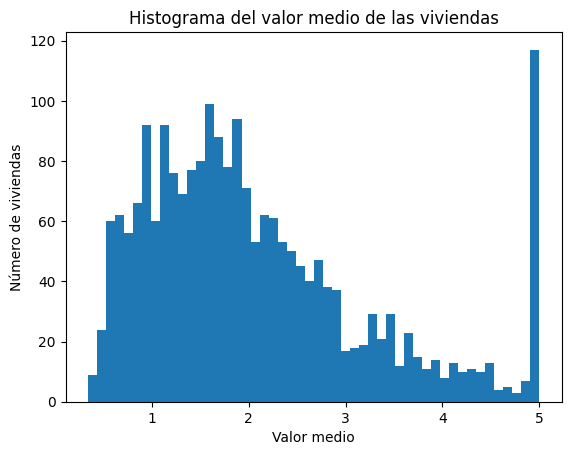

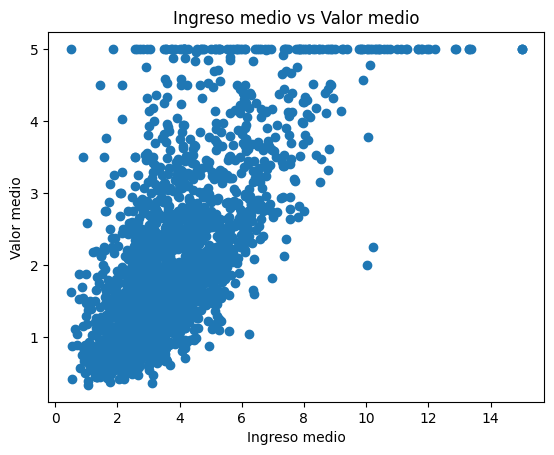

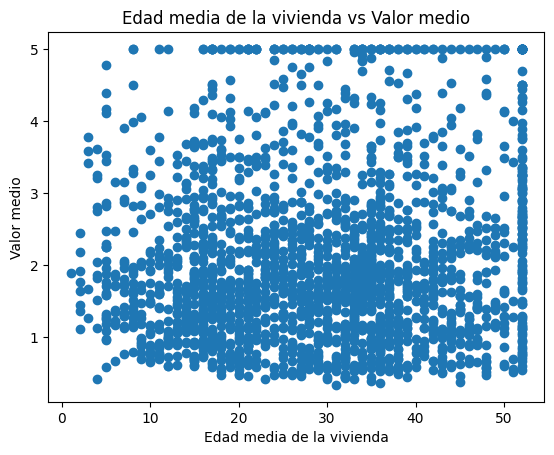

In [ ]:
import matplotlib.pyplot as plt

# Convertir a Pandas para visualizar
df_vis = spark_df.sample(False, 0.1).toPandas()

# Histograma
plt.hist(df_vis['Target'], bins=50)
plt.title('Histograma del valor medio de las viviendas')
plt.xlabel('Valor medio')
plt.ylabel('Número de viviendas')
plt.show()

# Scatter plots
plt.scatter(df_vis['MedInc'], df_vis['Target'])
plt.title('Ingreso medio vs Valor medio')
plt.xlabel('Ingreso medio')
plt.ylabel('Valor medio')
plt.show()

plt.scatter(df_vis['HouseAge'], df_vis['Target'])
plt.title('Edad media de la vivienda vs Valor medio')
plt.xlabel('Edad media de la vivienda')
plt.ylabel('Valor medio')
plt.show()


In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Split data
train_data, test_data = spark_df.randomSplit([0.8, 0.2], seed=42)

# VectorAssembler
assembler = VectorAssembler(inputCols=data.feature_names, outputCol="features")
train_data = assembler.transform(train_data)
test_data = assembler.transform(test_data)

# Sólo seleccionamos "features" y "Target"
train_data = train_data.select(["features", "Target"])
test_data = test_data.select(["features", "Target"])


In [ ]:
lr = LinearRegression(featuresCol='features', labelCol='Target')
lr_model = lr.fit(train_data)
predictions = lr_model.transform(test_data)


In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

# Usaremos varias métricas de error
evaluators = [
    ('RMSE', 'rmse'),
    ('MSE', 'mse'),
    ('MAE', 'mae'),
    ('R2', 'r2')
]

for name, metric in evaluators:
    evaluator = RegressionEvaluator(labelCol="Target", predictionCol="prediction", metricName=metric)
    error = evaluator.evaluate(predictions)
    print(f"{name}: {error:.4f}")


RMSE: 0.7333
MSE: 0.5377
MAE: 0.5348
R2: 0.5864


In [ ]:
from pyspark.sql import SparkSession
from sklearn.datasets import fetch_california_housing
import pandas as pd
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression, GeneralizedLinearRegression, GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
import matplotlib.pyplot as plt

# Inicializar Spark
spark = SparkSession.builder.appName("CaliforniaHousing").getOrCreate()

# Cargar datos y convertir a DataFrame de Spark
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target
spark_df = spark.createDataFrame(df)

# Separar en conjuntos de entrenamiento y prueba
train_data, test_data = spark_df.randomSplit([0.8, 0.2], seed=42)

# Preparar los datos
assembler = VectorAssembler(inputCols=data.feature_names, outputCol="features")
train_data = assembler.transform(train_data).select(["features", "Target"])
test_data = assembler.transform(test_data).select(["features", "Target"])


Regresión lineal

In [ ]:
# Entrenamiento
lr = LinearRegression(featuresCol='features', labelCol='Target')
lr_model = lr.fit(train_data)
lr_predictions = lr_model.transform(test_data)

# Evaluación
evaluator = RegressionEvaluator(labelCol="Target", predictionCol="prediction", metricName="rmse")
lr_rmse = evaluator.evaluate(lr_predictions)
print(f"Root Mean Squared Error (RMSE) on test data = {lr_rmse}")


Root Mean Squared Error (RMSE) on test data = 0.733293906676871


Regresión de Ridge (Regresión lineal con regularización L2)


In [ ]:
# Entrenamiento
ridge = LinearRegression(featuresCol='features', labelCol='Target', regParam=0.3, elasticNetParam=0)
ridge_model = ridge.fit(train_data)
ridge_predictions = ridge_model.transform(test_data)

# Evaluación
ridge_rmse = evaluator.evaluate(ridge_predictions)
print(f"Root Mean Squared Error (RMSE) on test data = {ridge_rmse}")


Root Mean Squared Error (RMSE) on test data = 0.7819120996631085


Regresión de Lasso (Regresión lineal con regularización L1)

In [ ]:
# Entrenamiento
lasso = LinearRegression(featuresCol='features', labelCol='Target', regParam=0.3, elasticNetParam=1)
lasso_model = lasso.fit(train_data)
lasso_predictions = lasso_model.transform(test_data)

# Evaluación
lasso_rmse = evaluator.evaluate(lasso_predictions)
print(f"Root Mean Squared Error (RMSE) on test data = {lasso_rmse}")


Root Mean Squared Error (RMSE) on test data = 0.8762800653016141


Gradient-Boosted Trees para Regresión

In [ ]:
# Entrenamiento
gbt = GBTRegressor(featuresCol='features', labelCol='Target')
gbt_model = gbt.fit(train_data)
gbt_predictions = gbt_model.transform(test_data)

# Evaluación
gbt_rmse = evaluator.evaluate(gbt_predictions)
print(f"Root Mean Squared Error (RMSE) on test data = {gbt_rmse}")


Root Mean Squared Error (RMSE) on test data = 0.5700042519656872


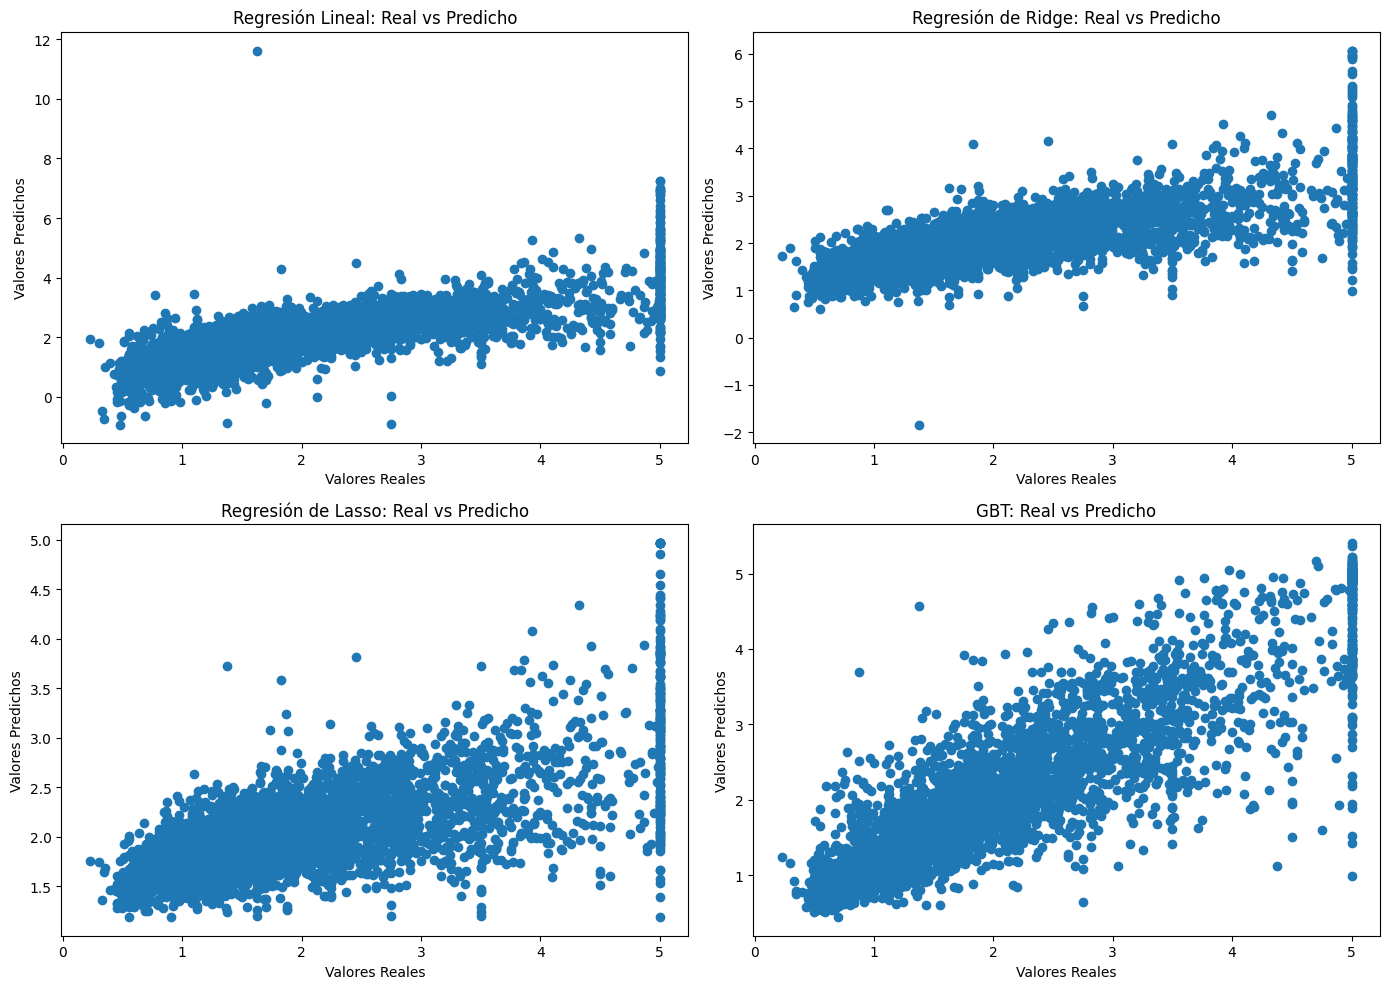

In [ ]:
# Convertir a Pandas para visualizar
lr_pd = lr_predictions.toPandas()
ridge_pd = ridge_predictions.toPandas()
lasso_pd = lasso_predictions.toPandas()
gbt_pd = gbt_predictions.toPandas()

# Crear subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráficos
axes[0, 0].scatter(lr_pd['Target'], lr_pd['prediction'])
axes[0, 0].set_title('Regresión Lineal: Real vs Predicho')

axes[0, 1].scatter(ridge_pd['Target'], ridge_pd['prediction'])
axes[0, 1].set_title('Regresión de Ridge: Real vs Predicho')

axes[1, 0].scatter(lasso_pd['Target'], lasso_pd['prediction'])
axes[1, 0].set_title('Regresión de Lasso: Real vs Predicho')

axes[1, 1].scatter(gbt_pd['Target'], gbt_pd['prediction'])
axes[1, 1].set_title('GBT: Real vs Predicho')

for ax in axes.flat:
    ax.set(xlabel='Valores Reales', ylabel='Valores Predichos')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Convertir a Pandas para visualizar
lr_pd = lr_predictions.toPandas()
ridge_pd = ridge_predictions.toPandas()
lasso_pd = lasso_predictions.toPandas()
gbt_pd = gbt_predictions.toPandas()
train_pd = train_data.toPandas()
test_pd = test_data.toPandas()


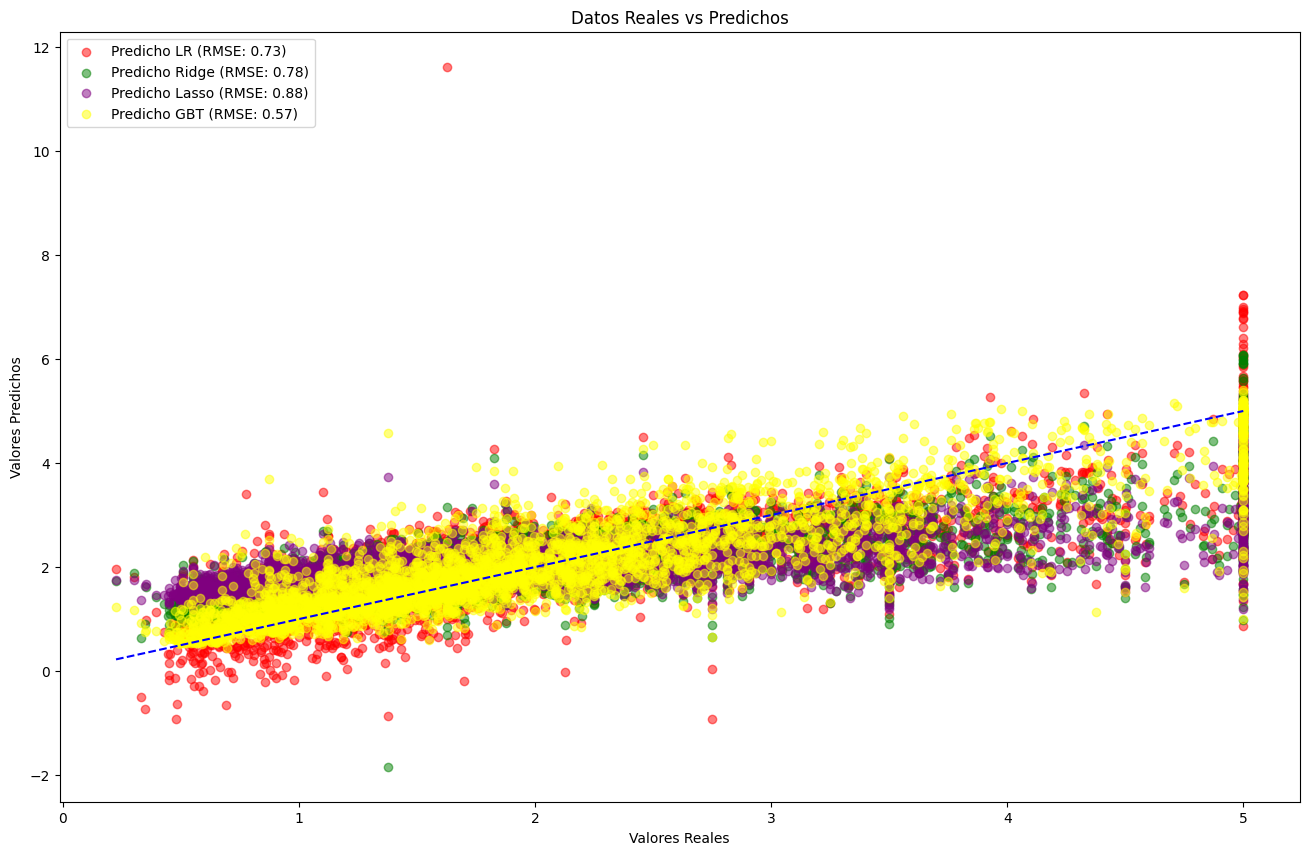

In [ ]:
plt.figure(figsize=(16, 10))

# Puntos reales vs. predichos
plt.scatter(test_pd['Target'], lr_pd['prediction'], color='red', label=f'Predicho LR (RMSE: {lr_rmse:.2f})', alpha=0.5)
plt.scatter(test_pd['Target'], ridge_pd['prediction'], color='green', label=f'Predicho Ridge (RMSE: {ridge_rmse:.2f})', alpha=0.5)
plt.scatter(test_pd['Target'], lasso_pd['prediction'], color='purple', label=f'Predicho Lasso (RMSE: {lasso_rmse:.2f})', alpha=0.5)
plt.scatter(test_pd['Target'], gbt_pd['prediction'], color='yellow', label=f'Predicho GBT (RMSE: {gbt_rmse:.2f})', alpha=0.5)

# Línea para perfecta predicción
plt.plot([min(test_pd['Target']), max(test_pd['Target'])], [min(test_pd['Target']), max(test_pd['Target'])], color='blue', linestyle='--')

# Título y leyendas
plt.title('Datos Reales vs Predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend(loc='upper left')

plt.show()


El mejor modelo es: Gradient Boosted Trees con RMSE = 0.57


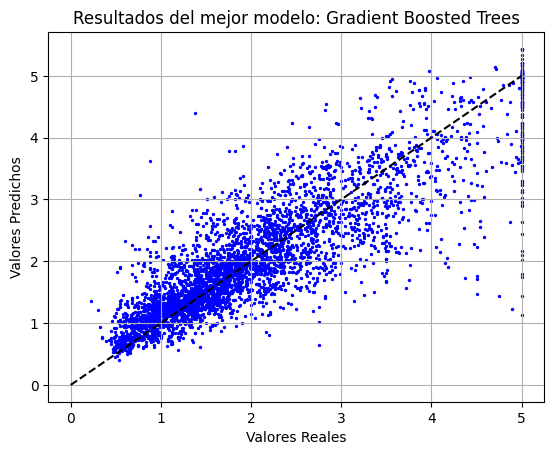

In [ ]:
# Calculando RMSE para cada modelo
rmse_values = {
    "Linear Regression": evaluator.evaluate(lr_predictions),
    "Ridge Regression": evaluator.evaluate(ridge_predictions),
    "Lasso Regression": evaluator.evaluate(lasso_predictions),
    "Gradient Boosted Trees": evaluator.evaluate(gbt_predictions)
}

# Seleccionando el mejor modelo basado en el menor RMSE
best_model_name = min(rmse_values, key=rmse_values.get)
print(f"El mejor modelo es: {best_model_name} con RMSE = {rmse_values[best_model_name]:.2f}")

# Ahora vamos a graficar la línea de regresión del mejor modelo con los datos reales
if best_model_name == "Gradient Boosted Trees":
    # GBT no es lineal, así que usaremos un scatter plot
    predictions_best = gbt_predictions.toPandas()
    plt.scatter(predictions_best['Target'], predictions_best['prediction'], color='blue', s=2)
    plt.plot([0, 5], [0, 5], '--k')  # Línea diagonal para referencia
else:
    # Para los modelos lineales, podemos graficar una línea de regresión
    predictions_best = gbt_predictions.toPandas() if best_model_name == "Gradient Boosted Trees" else (
        lasso_predictions.toPandas() if best_model_name == "Lasso Regression" else (
            ridge_predictions.toPandas() if best_model_name == "Ridge Regression" else lr_predictions.toPandas()
        )
    )
    plt.scatter(predictions_best['Target'], predictions_best['prediction'], color='blue', s=2)
    plt.plot(predictions_best['Target'], predictions_best['prediction'], color='red')

plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title(f"Resultados del mejor modelo: {best_model_name}")
plt.grid(True)
plt.show()


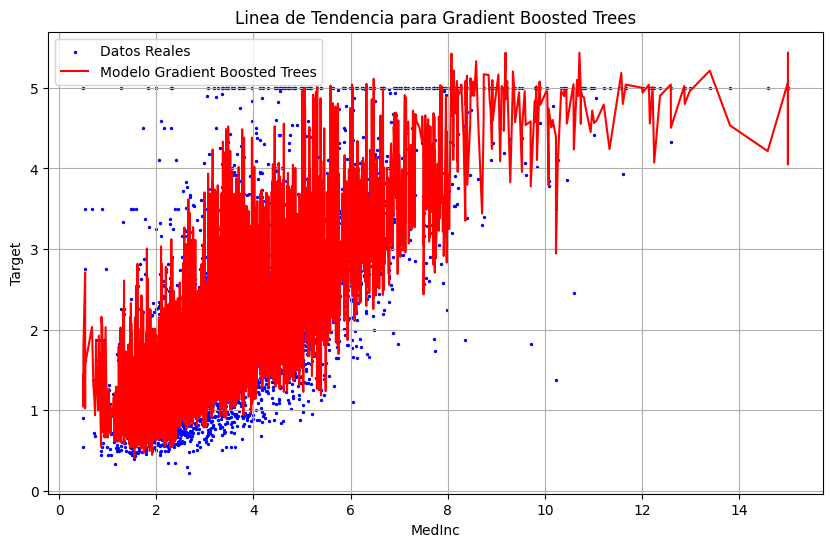

In [ ]:
from pyspark.ml.feature import VectorSlicer
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType
import matplotlib.pyplot as plt

# 1. Extraer una característica para la visualización
slicer = VectorSlicer(inputCol="features", outputCol="MedInc", indices=[0])
sliced_train = slicer.transform(train_data)
sliced_test = slicer.transform(test_data)

# 2. Convertir MedInc de DenseVector a escalar
extract_first_value = udf(lambda x: float(x[0]), DoubleType())
sliced_train = sliced_train.withColumn("MedInc", extract_first_value("MedInc"))
sliced_test = sliced_test.withColumn("MedInc", extract_first_value("MedInc"))

# 3. Función para predecir y crear la línea (o curva) del modelo
def predict_and_plot(model, data):
    predictions = model.transform(data)
    pd_data = predictions.toPandas().sort_values(by='MedInc')
    return pd_data['MedInc'].tolist(), pd_data['prediction'].tolist()

# 4. Dependiendo del mejor modelo, obtenemos X (MedInc) y Y (predictions) para la línea (o curva)
if best_model_name == "Linear Regression":
    x, y = predict_and_plot(lr_model, sliced_test)
elif best_model_name == "Ridge Regression":
    x, y = predict_and_plot(ridge_model, sliced_test)
elif best_model_name == "Lasso Regression":
    x, y = predict_and_plot(lasso_model, sliced_test)
else:
    x, y = predict_and_plot(gbt_model, sliced_test)

# 5. Crear el gráfico
plt.figure(figsize=(10, 6))
plt.scatter(sliced_test.toPandas()['MedInc'], sliced_test.toPandas()['Target'], color='blue', s=2, label="Datos Reales")
plt.plot(x, y, color='red', label=f"Modelo {best_model_name}")
plt.xlabel("MedInc")
plt.ylabel("Target")
plt.title(f"Linea de Tendencia para {best_model_name}")
plt.legend()
plt.grid(True)
plt.show()


### Regresión Logística

La regresión logística es un método utilizado para la clasificación binaria, donde se busca encontrar una relación entre las características (variables independientes) y la probabilidad de que una instancia pertenezca a una clase en particular. La función logística (también conocida como sigmoid) se utiliza para transformar la combinación lineal de las características en un valor entre 0 y 1, que se interpreta como la probabilidad de pertenecer a una clase:

La función logística es:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Donde \(z\) es la combinación lineal de las características y los pesos:
$$
z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n
$$

Aquí, $(\beta_0, \beta_1, \beta_2, \ldots, \beta_n$) son los coeficientes de regresión que se ajustan durante el entrenamiento. La predicción final se realiza comparando la probabilidad calculada con un umbral (por ejemplo, 0.5) para determinar la clase a la que pertenece la instancia.

### Árboles de Decisión:

Los árboles de decisión son estructuras jerárquicas que toman decisiones basadas en condiciones aplicadas a las características de entrada. Cada nodo interno del árbol representa una prueba en una característica, y cada hoja representa una clase de salida. El proceso de selección de características se basa en la minimización de alguna métrica de impureza, como el índice de Gini o la entropía.

El proceso de construcción del árbol y la toma de decisiones se describe matemáticamente de la siguiente manera:

1. Para cada nodo interno del árbol, se selecciona una característica $(f$) y un valor de umbral \(t\) que divide los datos en dos grupos, izquierdo y derecho.

2. La impureza en el nodo se calcula utilizando una métrica como el índice de Gini ($(I_G$)) o la entropía ($(I_H$) en ambos subgrupos.

3. La ganancia de información al dividir el nodo se calcula restando la impureza ponderada de los subgrupos de la impureza del nodo padre:
$$
\text{Ganancia} = \text{Impureza inicial} - \left(\frac{N_{\text{izquierda}}}{N_{\text{total}}} \cdot \text{Impureza izquierda} + \frac{N_{\text{derecha}}}{N_{\text{total}}} \cdot \text{Impureza derecha}\right)
$$

4. Se repite el proceso de selección de características y división para los nodos hijos hasta que se alcance un criterio de parada, como la profundidad máxima o el número mínimo de muestras por hoja.

### Bosques Aleatorios:

Los Bosques Aleatorios son conjuntos de árboles de decisión que se entrenan en subconjuntos aleatorios de los datos y las características. Cada árbol en el bosque se entrena en una muestra bootstrap de los datos (muestra con reemplazo) y utiliza un subconjunto aleatorio de características en cada nodo.

La predicción en un Bosque Aleatorio es el resultado de la agregación de las predicciones individuales de los árboles. La clasificación se realiza tomando la mayoría de votos (clasificación) o promediando (regresión) las predicciones de los árboles.

### Gradient-Boosted Trees (GBTs):

GBTs es un algoritmo que construye un conjunto de árboles de decisión en secuencia, donde cada nuevo árbol se ajusta para corregir los errores residuales del conjunto actual de árboles. La predicción final se calcula sumando las predicciones ponderadas de todos los árboles.

El proceso matemático para GBTs implica la minimización de una función de pérdida (\(L\)) en cada iteración:
$$
L = \sum_{i=1}^{N} l(y_i, F_{m-1}(x_i) + f_m(x_i))
$$

Donde \(N\) es el número de muestras, $(y_i$) es el valor verdadero de la muestra \(i\), $(F_{m-1}(x_i)$) es la suma de las predicciones de los árboles anteriores, y $(f_m(x_i)$) es la predicción del nuevo árbol en la iteración \(m\).

### Support Vector Machines (SVM):

Support Vector Machines (SVM) es un algoritmo de clasificación que busca encontrar un hiperplano en un espacio de características que mejor separe dos clases distintas. El objetivo es maximizar el margen entre los puntos de datos de diferentes clases más cercanos al hiperplano.

Supongamos que tenemos un conjunto de datos de entrenamiento $D = \{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\}$, donde $x_i$ es un vector de características de la muestra $i$ y $y_i$ es su etiqueta de clase (1 para una clase y -1 para la otra). Nuestro objetivo es encontrar el vector de pesos $w$ y el término de sesgo $b$ que definen el hiperplano:

$$w \cdot x + b = 0$$

Para que el SVM funcione correctamente, queremos que los puntos de datos de diferentes clases estén lo más separados posible, lo que se traduce en maximizar el margen entre ellos. El margen es la distancia entre el hiperplano y los puntos de datos de soporte más cercanos de ambas clases. Los vectores de soporte son los puntos que están más cerca del hiperplano y son cruciales para la definición del mismo.

Para calcular el margen, primero necesitamos encontrar la distancia entre el hiperplano y un punto $x$ utilizando la fórmula:

$$\text{Distancia} = \frac{|w \cdot x + b|}{\|w\|}$$

Donde $\|w\|$ es la norma euclidiana del vector $w$. El margen es entonces dos veces la distancia al punto de soporte más cercano de cualquiera de las clases:

$$\text{Margen} = \frac{2}{\|w\|}$$

El objetivo principal es maximizar este margen mientras se cumplen ciertas restricciones. Intuitivamente, queremos que la suma de las distancias entre los puntos de datos y el hiperplano sea máxima. Matemáticamente, esto se puede expresar como:

$$\max_{w, b} \frac{2}{\|w\|}$$

Sujeto a las restricciones:

$$y_i (w \cdot x_i + b) \geq 1 \quad \text{para todo } i = 1, 2, \ldots, n$$

Estas restricciones aseguran que los puntos de datos se encuentren a ambos lados del hiperplano y estén correctamente clasificados.

Para resolver este problema de optimización, se introduce la función Lagrangiana y se maximiza con respecto a las variables de Lagrange $\alpha_i$:

$$\mathcal{L}(w, b, \alpha) = \frac{1}{2} \|w\|^2 - \sum_{i=1}^{n} \alpha_i [y_i (w \cdot x_i + b) - 1]$$

Donde $\alpha_i$ son los multiplicadores de Lagrange asociados con las restricciones. La función Lagrangiana tiene dos partes: una que busca maximizar el margen y otra que penaliza las violaciones de las restricciones.

El problema dual se obtiene minimizando la función Lagrangiana con respecto a $w$ y $b$, lo que conduce a expresiones en términos de los multiplicadores de Lagrange $\alpha_i$. La solución óptima se encuentra maximizando la función dual con respecto a $\alpha_i$:

$$\max_{\alpha} \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j y_i y_j (x_i \cdot x_j)$$

Sujeto a las restricciones:

$$\alpha_i \geq 0 \quad \text{y} \quad \sum_{i=1}^{n} \alpha_i y_i = 0$$

Una vez que se encuentran los valores óptimos de $\alpha_i$, podemos calcular $w$ y $b$ para obtener el hiperplano:

$$w = \sum_{i=1}^{n} \alpha_i y_i x_i$$

$$b = y_j - \sum_{i=1}^{n} \alpha_i y_i (x_i \cdot x_j)$$

Donde $j$ es un índice correspondiente a cualquier vector de soporte.

Este es el procedimiento básico para entrenar un SVM. En la fase de predicción, una instancia desconocida se clasifica calculando $w \cdot x + b$ y asignando la etiqueta $y$ según el signo del resultado.

Cabe mencionar que en casos donde los datos no son linealmente separables, se pueden utilizar trucos de kernel para mapear los datos a un espacio de mayor dimensión donde puedan ser separados linealmente. Esto se realiza reemplazando el producto punto $x_i \cdot x_j$ por una función de kernel $K(x_i, x_j)$ en el problema de optimización dual.

### Naive Bayes:

El clasificador Naive Bayes se basa en el teorema de Bayes y la suposición de independencia condicional entre las características dadas las clases. Para una instancia $(x$) y una clase $(C_k$), el clasificador calcula la probabilidad posterior utilizando la regla de Bayes:
$$
P(C_k | x) = \frac{P(C_k) \cdot P(x | C_k)}{P(x)}
$$

Donde $(P(C_k)$) es la probabilidad prior de la clase $(C_k$), $(P(x | C_k)$) es la probabilidad de las características \(x\) dado $(C_k$), y $(P(x)$) es la probabilidad marginal de \(x\).

La suposición "naive" (ingenua) es que las características son independientes dado $(C_k$), lo que simplifica el cálculo de $(P(x | C_k)$) a través de las distribuciones de probabilidad de cada característica.



**Sección 1: Importar bibliotecas**
```python
from pyspark.sql import SparkSession
from sklearn.datasets import load_breast_cancer
import pandas as pd
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GBTClassifier, LinearSVC, NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt
```
En esta sección, se importan todas las bibliotecas necesarias para el código. Cada biblioteca se utiliza para tareas específicas, como cargar datos, manipularlos, crear modelos y realizar evaluaciones.

**Sección 2: Inicializar Spark**
```python
spark = SparkSession.builder.appName("BreastCancerClassification").getOrCreate()
```
Aquí se crea una instancia de `SparkSession`, que es la entrada principal para trabajar con Spark. El método `appName` establece un nombre para la aplicación Spark y `getOrCreate` obtiene una instancia existente o crea una nueva si no existe.

**Sección 3: Cargar y preparar los datos**
```python
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['label'] = data.target
spark_df = spark.createDataFrame(df)
```
En esta sección, los datos del conjunto de datos de cáncer de mama se cargan utilizando la función `load_breast_cancer()` de scikit-learn. Luego, se crean un DataFrame de Pandas llamado `df` que contiene las características y las etiquetas, y posteriormente se convierte en un DataFrame de Spark llamado `spark_df`.

**Sección 4: Separar en conjuntos de entrenamiento y prueba**
```python
train_data, test_data = spark_df.randomSplit([0.8, 0.2], seed=42)
```
En esta parte, los datos se dividen en conjuntos de entrenamiento y prueba utilizando el método `randomSplit`. Se especifica una proporción de 0.8 para entrenamiento y 0.2 para prueba. El argumento `seed` asegura que la división sea reproducible.

**Sección 5: Preparar los datos para el modelado**
```python
assembler = VectorAssembler(inputCols=data.feature_names, outputCol="features")
train_data = assembler.transform(train_data).select(["features", "label"])
test_data = assembler.transform(test_data).select(["features", "label"])
```
En esta sección, se crea un `VectorAssembler` que toma las características del conjunto de datos y las combina en una columna llamada "features". Luego, se transforman los conjuntos de entrenamiento y prueba usando el ensamblador de vectores y se seleccionan solo las columnas "features" y "label".

**Sección 6: Definir modelos y evaluador**
```python
models = [
    ("Logistic Regression", LogisticRegression(featuresCol='features', labelCol='label')),
    ("Decision Tree", DecisionTreeClassifier(featuresCol='features', labelCol='label')),
    ("Random Forest", RandomForestClassifier(featuresCol='features', labelCol='label')),
    ("GBT", GBTClassifier(featuresCol='features', labelCol='label')),
    ("SVM", LinearSVC(featuresCol='features', labelCol='label')),
    ("Naive Bayes", NaiveBayes(featuresCol='features', labelCol='label'))
]
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
```
En esta parte, se define una lista de modelos a evaluar, donde cada modelo es una tupla que contiene el nombre del modelo y una instancia del clasificador correspondiente. Luego, se crea un evaluador de clasificación multiclase utilizando `MulticlassClassificationEvaluator`, que se utilizará para evaluar la precisión de los modelos.

**Sección 7: Evaluar modelos y encontrar el mejor**
```python
best_acc = 0.0
best_model_name = ""
for name, model in models:
    model_fit = model.fit(train_data)
    predictions = model_fit.transform(test_data)
    accuracy = evaluator.evaluate(predictions)
    print(f"Accuracy for {name} = {accuracy}")
    if accuracy > best_acc:
        best_acc = accuracy
        best_model_name = name
print(f"\nThe best model is: {best_model_name} with Accuracy = {best_acc:.2f}")
```
En esta sección, se itera a través de la lista de modelos. Para cada modelo, se ajusta el modelo a los datos de entrenamiento, se realizan predicciones en los datos de prueba y se evalúa la precisión del modelo. Si la precisión del modelo actual es mayor que la mejor precisión registrada, se actualizan las variables `best_acc` y `best_model_name`. Al final de la iteración, se imprime el mejor modelo y su precisión.

**Sección 8: Evaluación adicional del modelo**
```python
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np

# Supongamos que el mejor modelo es RandomForest (cámbialo según tu resultado anterior)
best_model = RandomForestClassifier(featuresCol='features', labelCol='label').fit(train_data)
predictions = best_model.transform(test_data).select("label", "prediction", "probability").toPandas()
```
En esta sección, se importan las bibliotecas necesarias para realizar evaluaciones adicionales del modelo. Se crea una instancia del mejor modelo, que en este caso es el `RandomForestClassifier`, utilizando los mismos parámetros que antes. Luego, se realizan predicciones en los datos de prueba y se almacenan en un DataFrame de Pandas llamado `predictions`, que incluye las etiquetas reales, las predicciones y las probabilidades de predicción.

**Sección 9: Matriz de Confusión**
```python
cm = confusion_matrix(predictions['label'], predictions['prediction'])
plt.figure(figsize=(6,6))
# ... (Código para visualizar la matriz de confusión)
```
En esta parte, se calcula la matriz de confusión utilizando la función `confusion_matrix` de scikit-learn a partir de las etiquetas reales y las predicciones del modelo. Luego, se utiliza el código proporcionado para visualizar la matriz de confusión utilizando matplotlib. Esta matriz muestra cómo las etiquetas reales se comparan con las etiquetas predichas por el modelo.

**Sección 10: Curva ROC**
```python
prob = [i[1] for i in predictions["probability"].tolist()]
fpr, tpr, _ = roc_curve(predictions["label"], prob)
roc_auc = auc(fpr, tpr)
plt.figure()
# ... (Código para trazar la curva ROC)
```
En esta sección, se extraen las probabilidades de la clase positiva de las predicciones del modelo y se calculan los valores necesarios para trazar la curva ROC utilizando `roc_curve` de scikit-learn. Luego, se calcula el área bajo la curva (AUC) utilizando la función `auc`. El código proporcionado se utiliza para trazar la curva ROC y el área bajo la curva utilizando matplotlib.

**Sección 11: Visualización de la importancia de características**
```python
import numpy as np

# Convertir el objeto SparseVector a numpy array
importances_array = np.array(importances)

# Luego, usar el numpy array para las operaciones de indexación
sorted_indices = np.argsort(importances_array)[::-1]
names = [data.feature_names[i] for i in sorted_indices]

plt.figure(figsize=(15,5))
plt.title("Importancia de Características", size=15)
plt.bar(range(len(importances_array)), importances_array[sorted_indices])
plt.xticks(range(len(importances_array)), names, rotation=90)
plt.show()
```
En esta sección, se supone que hay una variable llamada `importances` que contiene la importancia de las características según el modelo RandomForest (asegúrate de definir esta variable previamente en tu código). Se convierte este objeto SparseVector a un numpy array utilizando `np.array`, y luego se ordenan los índices de las características en función de su importancia. Luego, se utiliza matplotlib para trazar un gráfico de barras que muestra la importancia de cada característica, con los nombres de las características en el eje x.

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=1d73f4065a91d271aab7839f2069c1dc73d7b0c0f2211007b48ed5934348a0dd
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from sklearn.datasets import load_breast_cancer
import pandas as pd
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GBTClassifier, LinearSVC, NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt

# Inicializar Spark
spark = SparkSession.builder.appName("BreastCancerClassification").getOrCreate()

# Cargar datos y convertir a DataFrame de Spark
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['label'] = data.target
spark_df = spark.createDataFrame(df)

# Separar en conjuntos de entrenamiento y prueba
train_data, test_data = spark_df.randomSplit([0.8, 0.2], seed=42)

# Preparar los datos
assembler = VectorAssembler(inputCols=data.feature_names, outputCol="features")
train_data = assembler.transform(train_data).select(["features", "label"])
test_data = assembler.transform(test_data).select(["features", "label"])

models = [
    ("Logistic Regression", LogisticRegression(featuresCol='features', labelCol='label')),
    ("Decision Tree", DecisionTreeClassifier(featuresCol='features', labelCol='label')),
    ("Random Forest", RandomForestClassifier(featuresCol='features', labelCol='label')),
    ("GBT", GBTClassifier(featuresCol='features', labelCol='label')),
    ("SVM", LinearSVC(featuresCol='features', labelCol='label')),
    ("Naive Bayes", NaiveBayes(featuresCol='features', labelCol='label'))
]

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

best_acc = 0.0
best_model_name = ""

for name, model in models:
    model_fit = model.fit(train_data)
    predictions = model_fit.transform(test_data)

    accuracy = evaluator.evaluate(predictions)
    print(f"Accuracy for {name} = {accuracy}")

    if accuracy > best_acc:
        best_acc = accuracy
        best_model_name = name

print(f"\nThe best model is: {best_model_name} with Accuracy = {best_acc:.2f}")


Accuracy for Logistic Regression = 0.9368421052631579
Accuracy for Decision Tree = 0.8947368421052632
Accuracy for Random Forest = 0.968421052631579
Accuracy for GBT = 0.9052631578947369
Accuracy for SVM = 0.9473684210526315
Accuracy for Naive Bayes = 0.9052631578947369

The best model is: Random Forest with Accuracy = 0.97


In [ ]:
# Visualizar las primeras filas del DataFrame de Spark
spark_df.show()


+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+-----+
|mean radius|mean texture|mean perimeter|mean area|mean smoothness|mean compactness|mean concavity|mean concave points|mean symmetry|mean fractal dimension|radius error|texture error|perimeter error|area error|smoothness error|compactness error|concavity error|concave points error|symmetry error|fractal dimension error|worst radius|worst texture|worst perimeter|worst area|worst smoothness|worst compactness|worst concavity|worst concave points|worst symmetry|worst fractal dimension|label|
+-----------+-

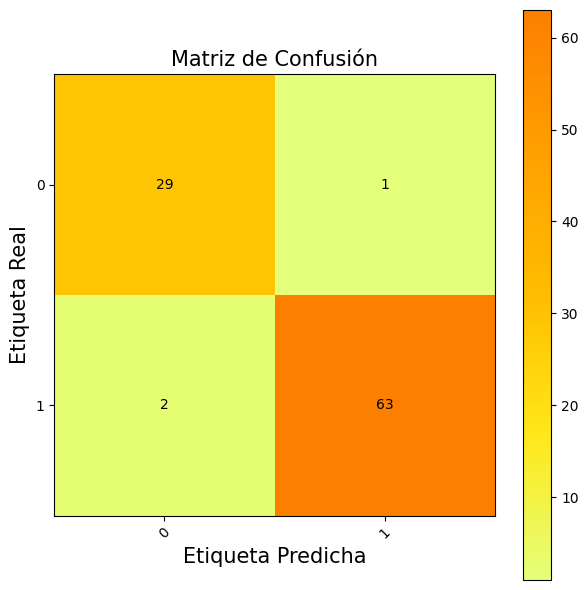

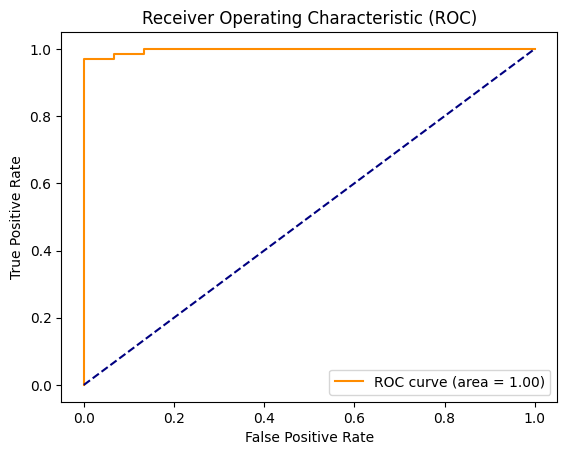

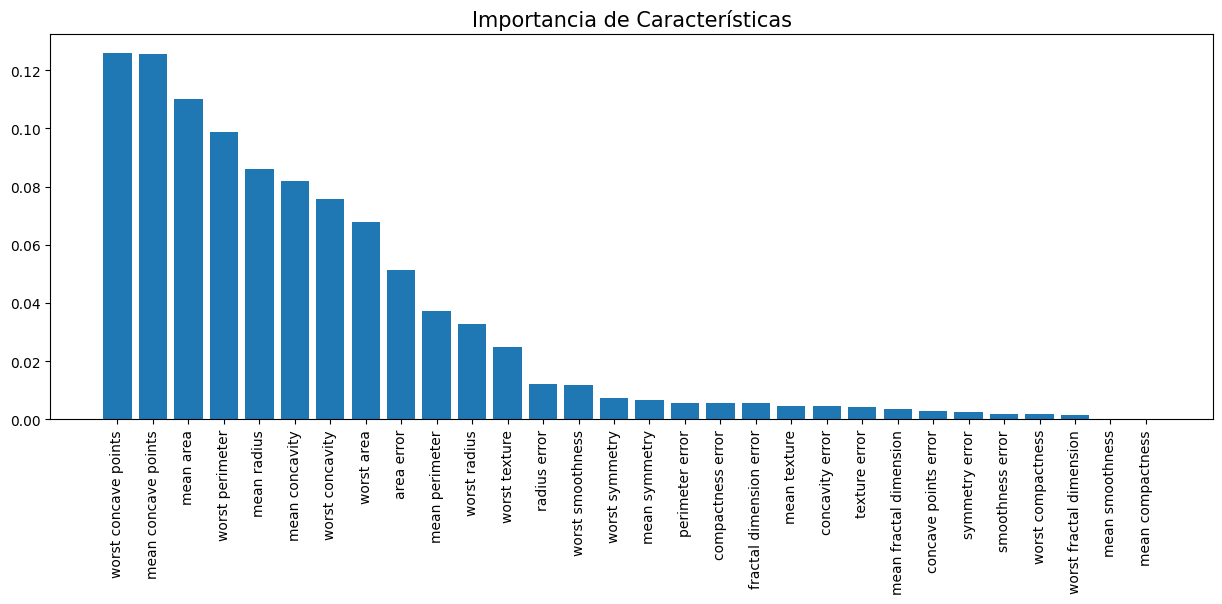

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que el mejor modelo es RandomForest
best_model = RandomForestClassifier(featuresCol='features', labelCol='label').fit(train_data)
predictions = best_model.transform(test_data).select("label", "prediction", "probability").toPandas()

# 1. Matriz de Confusión
cm = confusion_matrix(predictions['label'], predictions['prediction'])
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
plt.title('Matriz de Confusión', size=15)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'], rotation=45, size=10)
plt.yticks(tick_marks, ['0', '1'], size=10)
plt.tight_layout()
plt.ylabel('Etiqueta Real', size=15)
plt.xlabel('Etiqueta Predicha', size=15)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x),
        horizontalalignment='center',
        verticalalignment='center')
plt.show()

# 2. Curva ROC
prob = [i[1] for i in predictions["probability"].tolist()]
fpr, tpr, _ = roc_curve(predictions["label"], prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Suponiendo que `best_model` es el modelo entrenado de bosque aleatorio
importances = best_model.featureImportances

# Extraer valores e índices del SparseVector
importances_values = importances.values
importances_indices = importances.indices

# Crear un array de numpy para representar las importancias
importances_array = np.zeros(importances.size)
importances_array[importances_indices] = importances_values

# Ordenar las importancias y obtener los nombres de las características
sorted_indices = np.argsort(importances_array)[::-1]
names = [data.feature_names[i] for i in sorted_indices]

# Gráfico de barras para la importancia de las características
plt.figure(figsize=(15,5))
plt.title("Importancia de Características", size=15)
plt.bar(range(len(importances_array)), importances_array[sorted_indices])
plt.xticks(range(len(importances_array)), names, rotation=90)
plt.show()


## Explicación del Dataset Default Payment Next Month

Este conjunto de datos se ha cargado desde un archivo CSV ubicado en la siguiente URL: [default_of_credit_card_clients.csv](https://azuremlexamples.blob.core.windows.net/datasets/credit_card/default_of_credit_card_clients.csv). El conjunto de datos contiene información relacionada con tarjetas de crédito y la probabilidad de que los clientes incumplan con el pago de sus tarjetas el próximo mes.

1. **LIMIT_BAL:** Este campo representa el límite de crédito otorgado a cada cliente. Es una variable numérica que indica la cantidad máxima de crédito que un cliente puede usar.

2. **SEX:** Esta columna indica el género del cliente, donde el valor 1 representa a hombres y el valor 2 representa a mujeres.

3. **EDUCATION:** Indica el nivel de educación del cliente con valores numéricos que representan diferentes categorías de educación.

4. **MARRIAGE:** Representa el estado civil del cliente, con valores numéricos que indican el estado civil, como soltero (1), casado (2), divorciado (3) u otros (0).

5. **AGE:** Es la edad del cliente, representada como un número entero.

6. **PAY_0 a PAY_6:** Estas columnas representan el historial de pago del cliente en los últimos 6 meses. Los valores en estas columnas indican el estado de pago, donde valores positivos representan pagos atrasados y valores negativos representan pagos realizados a tiempo.

7. **BILL_AMT1 a BILL_AMT6:** Estas columnas contienen los montos de los estados de cuenta (facturas) en los últimos 6 meses.

8. **PAY_AMT1 a PAY_AMT6:** Estas columnas representan los montos de los pagos realizados por el cliente en los últimos 6 meses.

9. **default payment next month:** Esta columna es la variable objetivo del conjunto de datos y contiene valores binarios, donde 1 indica que el cliente incumplió con el pago de su tarjeta de crédito el próximo mes y 0 indica que el cliente no incumplió.

El código que has proporcionado es un script de Python que utiliza la biblioteca PySpark para realizar análisis de datos y entrenar varios modelos de clasificación en un conjunto de datos de tarjetas de crédito. A continuación, desglosaré paso a paso el código y explicaré su funcionamiento detalladamente.

### Instalación de bibliotecas y módulos
El código comienza importando varias bibliotecas y módulos necesarios para llevar a cabo el análisis de datos y la construcción de modelos de clasificación. Estas bibliotecas incluyen tanto las relacionadas con PySpark como otras para visualización y métricas de rendimiento:

```python
!pip install pyspark
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.classification import (LogisticRegression, RandomForestClassifier,
                                      MultilayerPerceptronClassifier, LinearSVC, OneVsRest,
                                      NaiveBayes, FMClassifier)
from pyspark.ml.feature import (VectorAssembler, StringIndexer, Imputer, StandardScaler, PCA)
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col, when
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
```

Estos importaciones son esenciales para las diversas tareas que se llevarán a cabo más adelante, como la manipulación de datos, el preprocesamiento, la construcción de modelos y la evaluación de su rendimiento.

### Inicialización de SparkSession
Se inicializa una sesión de Spark utilizando `SparkSession`. Spark es un framework de procesamiento distribuido que se utiliza para tareas de análisis de datos a gran escala.

```python
# Inicializar SparkSession
spark = SparkSession.builder.appName("default_payment_classification").getOrCreate()
```

Una vez que se ha inicializado una sesión de Spark, es posible realizar operaciones de procesamiento de datos en paralelo utilizando la capacidad de procesamiento distribuido de Spark.

### Carga de datos
El código continúa cargando un conjunto de datos desde una URL utilizando la biblioteca Pandas. Los datos se almacenan en un DataFrame de Pandas llamado `credit_df`. El conjunto de datos parece ser información sobre tarjetas de crédito.

```python
# Cargar datos
url = "https://azuremlexamples.blob.core.windows.net/datasets/credit_card/default_of_credit_card_clients.csv"
credit_df = pd.read_csv(url, header=1, index_col=0)
```

El argumento `header=1` se utiliza para especificar que la primera fila contiene los nombres de las columnas, y `index_col=0` se utiliza para establecer la primera columna como índice del DataFrame. El resultado es un DataFrame de Pandas que contiene los datos del conjunto de datos.

### División de datos
El siguiente paso es dividir los datos en conjuntos de entrenamiento y prueba utilizando la función `train_test_split` de Scikit-Learn. Esto se hace para poder entrenar modelos en un conjunto de datos y evaluar su rendimiento en otro conjunto de datos independiente.

```python
# Dividir en conjuntos de entrenamiento y prueba
train_df, test_df = train_test_split(credit_df, test_size=0.25)
```

El conjunto de entrenamiento (`train_df`) se utilizará para entrenar los modelos, mientras que el conjunto de prueba (`test_df`) se utilizará para evaluar su rendimiento.

### Conversión a DataFrames de Spark
A continuación, los DataFrames de Pandas se convierten en DataFrames de Spark utilizando la función `createDataFrame` de Spark.

```python
# Convertir a DataFrames de Spark
train_spark_df = spark.createDataFrame(train_df)
test_spark_df = spark.createDataFrame(test_df)
```

Los DataFrames de Spark se utilizan porque permiten el procesamiento distribuido en Spark y son compatibles con las operaciones de PySpark.

### Reemplazo de valores negativos y manejo de valores faltantes
Se realiza un preprocesamiento de los datos para reemplazar los valores negativos con 0 en ambos conjuntos de datos de Spark utilizando la función `when` de Spark.

```python
train_spark_df = train_spark_df.select([when(col(c) < 0, 0).otherwise(col(c)).alias(c) for c in train_spark_df.columns])
test_spark_df = test_spark_df.select([when(col(c) < 0, 0).otherwise(col(c)).alias(c) for c in test_spark_df.columns])
```

Esto asegura que no haya valores negativos en los datos, lo que podría causar problemas en algunos algoritmos de aprendizaje automático. Además, los valores faltantes se manejarán más adelante en el código.

### Preparación de los datos
A continuación, se realizan varias etapas de preprocesamiento de datos en preparación para el entrenamiento de modelos.

#### Ensamblaje de características
Se utiliza `VectorAssembler` para ensamblar las características del conjunto de datos en una sola columna llamada "assembled_features". Esto es necesario porque muchos algoritmos de aprendizaje automático de PySpark requieren que las características de entrada estén en una sola columna.

```python
feature_columns = train_spark_df.columns[:-1]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="assembled_features")
```

`feature_columns` contiene los nombres de las columnas de características del conjunto de datos.

#### Escalado de características
Las características ensambladas se escalan utilizando `StandardScaler` para asegurarse de que todas tengan la misma escala. Esto es importante para algoritmos que son sensibles a la escala de las características, como la regresión logística.

```python
scaler = StandardScaler(inputCol="assembled_features", outputCol="features")
```

#### Codificación de etiquetas
Se utiliza `StringIndexer` para codificar las etiquetas del conjunto de datos en valores numéricos. En este caso, se está codificando la columna "default payment next month" en una columna llamada "label", que se utilizará como la variable objetivo para el aprendizaje automático.

```python
indexer = StringIndexer(inputCol="default payment next month", outputCol="label")
```

### Aplicación de PCA (Análisis de Componentes Principales)
Se aplica PCA para reducir la dimensionalidad de las características. PCA es una técnica que reduce la cantidad de características manteniendo la mayor parte de la información. El número de componentes principales se selecciona automáticamente para mantener el 95% de la varianza explicada.

```python
pca = PCA(k=None, inputCol="features", outputCol="pca_features")
pca.setK(int(0.95 * len(feature_columns)))
```

Esto ayuda a reducir la complejidad de los modelos y puede mejorar su rendimiento en algunos casos.

### Definición

 de modelos de clasificación
Se definen varios modelos de clasificación que se utilizarán para entrenar y evaluar el rendimiento en los datos preprocesados. Los modelos incluyen regresión logística, bosques aleatorios, perceptrón multicapa, máquinas de vectores de soporte lineal, factorización de máquinas y naive Bayes.

```python
lr = LogisticRegression(featuresCol="features", labelCol="label")
rf = RandomForestClassifier(featuresCol="features", labelCol="label")
mlp = MultilayerPerceptronClassifier(layers=[len(feature_columns), 5, 4, 2], featuresCol="features", labelCol="label")
lsvc = LinearSVC(featuresCol="features", labelCol="label")
ovr = OneVsRest(classifier=lsvc, labelCol="label", featuresCol="features")
fm = FMClassifier(featuresCol="features", labelCol="label")
nb = NaiveBayes(featuresCol="features", labelCol="label")
```

Cada modelo tiene sus propias características y suposiciones, y se utilizarán para ver cuál se desempeña mejor en los datos de este conjunto específico.

### Creación de un pipeline para cada modelo
Se crea un pipeline para cada modelo, que incluye todas las etapas de preprocesamiento y el modelo en sí.

```python
models = {
    "Logistic Regression": Pipeline(stages=[imputer, assembler, scaler, pca, indexer, lr]),
    "Random Forest": Pipeline(stages=[imputer, assembler, scaler, pca, indexer, rf]),
    "Multilayer Perceptron": Pipeline(stages=[imputer, assembler, scaler, pca, indexer, mlp]),
    "Linear SVC (One-vs-Rest)": Pipeline(stages=[imputer, assembler, scaler, pca, indexer, ovr]),
    "Factorization Machines": Pipeline(stages=[imputer, assembler, scaler, pca, indexer, fm]),
    "Naive Bayes": Pipeline(stages=[imputer, assembler, scaler, pca, indexer, nb])
}
```

Cada pipeline se compone de las etapas de preprocesamiento y el modelo de clasificación correspondiente. Esto facilita el entrenamiento y la evaluación de los modelos de manera consistente.

### Entrenamiento y evaluación de modelos
Se utiliza un bucle `for` para iterar a través de cada modelo y realizar las siguientes acciones:

1. Se entrena el modelo utilizando el conjunto de entrenamiento.

```python
model = pipeline.fit(train_spark_df)
```

2. Se generan predicciones en el conjunto de prueba utilizando el modelo entrenado.

```python
predictions = model.transform(test_spark_df)
```

3. Se convierten las predicciones a un DataFrame de Pandas para su posterior análisis.

```python
predictions_pd = predictions.select("label", "prediction").toPandas()
```

4. Se calcula la matriz de confusión y se muestra como un mapa de calor utilizando la biblioteca Seaborn.

```python
cm = confusion_matrix(predictions_pd['label'], predictions_pd['prediction'])
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues')
plt.title(f'Matriz de Confusión para {name}')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()
```

La matriz de confusión muestra cuántas predicciones fueron clasificadas correctamente y cuántas incorrectamente para cada clase.

5. Se muestra un informe de clasificación que proporciona métricas de rendimiento detalladas.

```python
print(f"Reporte de Clasificación para {name}:\n{classification_report(predictions_pd['label'], predictions_pd['prediction'])}")
```

El informe de clasificación incluye métricas como precisión, recall, F1-score y soporte para cada clase.

6. Se calcula el F1-Score utilizando un evaluador de clasificación de múltiples clases de PySpark y se muestra.

```python
f1_score = evaluator.evaluate(predictions)
print(f"F1-Score para {name}: {f1_score}\n")
```

El F1-Score es una métrica que combina precisión y recall en una sola puntuación y se utiliza para evaluar el rendimiento general del modelo.

### Detener la sesión de Spark
Finalmente, se detiene la sesión de Spark una vez que se han entrenado y evaluado todos los modelos.

```python
spark.stop()
```

Esto libera los recursos de Spark utilizados y finaliza la ejecución del script.

El código realiza una serie de pasos desde la carga de datos hasta la evaluación de modelos utilizando PySpark. Cada modelo se preprocesa de la misma manera y se evalúa su rendimiento utilizando métricas como la matriz de confusión y el F1-Score. El objetivo es determinar cuál de los modelos es el más adecuado para el conjunto de datos de tarjetas de crédito en función de su rendimiento en el conjunto de prueba.

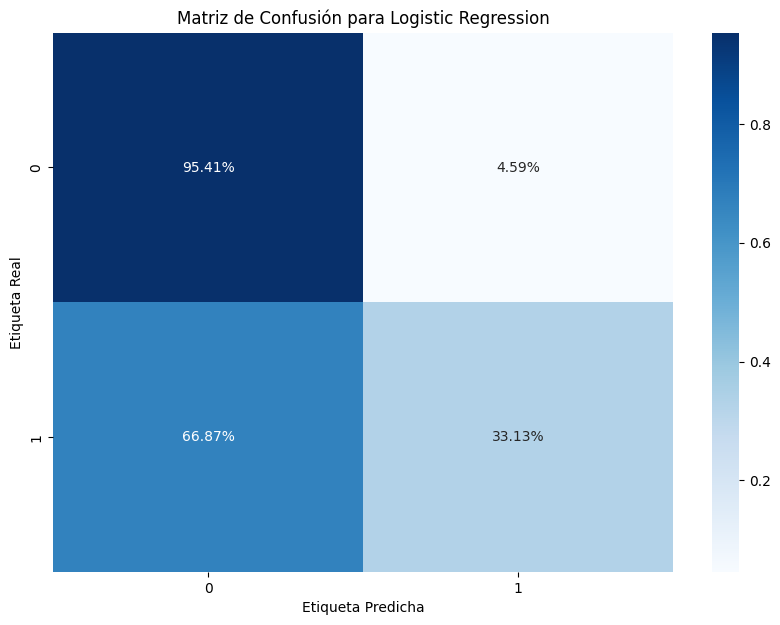

Reporte de Clasificación para Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89      5843
         1.0       0.67      0.33      0.44      1657

    accuracy                           0.82      7500
   macro avg       0.75      0.64      0.67      7500
weighted avg       0.80      0.82      0.79      7500

F1-Score para Logistic Regression: 0.7915386960834211



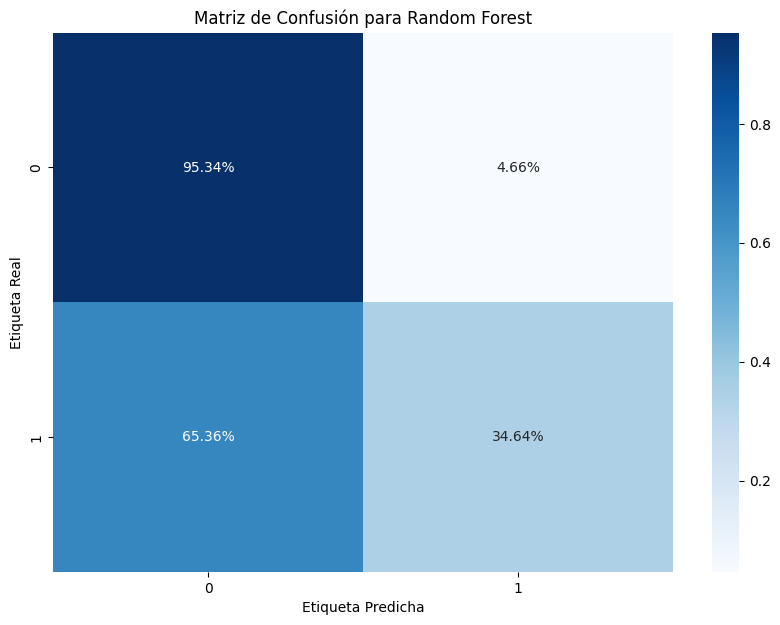

Reporte de Clasificación para Random Forest:
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      5843
         1.0       0.68      0.35      0.46      1657

    accuracy                           0.82      7500
   macro avg       0.76      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500

F1-Score para Random Forest: 0.7959265564153561



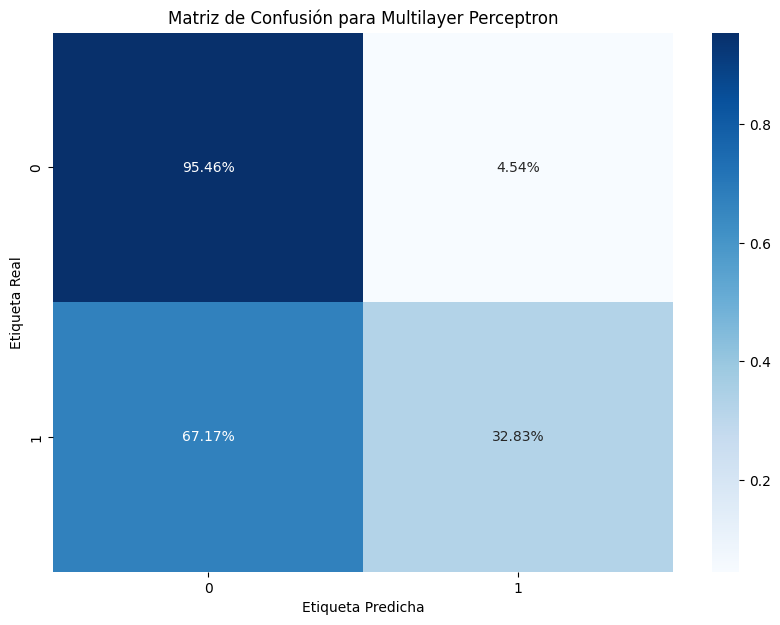

Reporte de Clasificación para Multilayer Perceptron:
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89      5843
         1.0       0.67      0.33      0.44      1657

    accuracy                           0.82      7500
   macro avg       0.75      0.64      0.67      7500
weighted avg       0.80      0.82      0.79      7500

F1-Score para Multilayer Perceptron: 0.7908911873119551



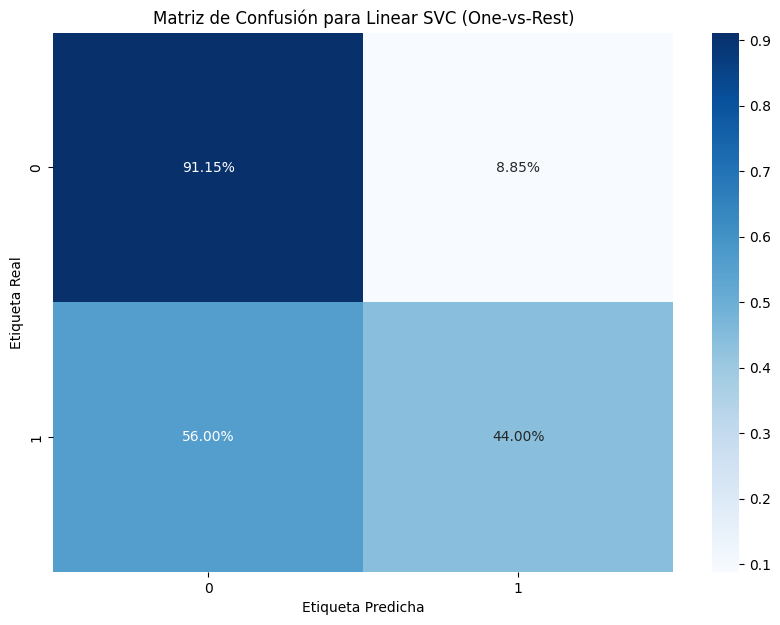

Reporte de Clasificación para Linear SVC (One-vs-Rest):
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      5843
         1.0       0.59      0.44      0.50      1657

    accuracy                           0.81      7500
   macro avg       0.72      0.68      0.69      7500
weighted avg       0.79      0.81      0.80      7500

F1-Score para Linear SVC (One-vs-Rest): 0.7969676438986566



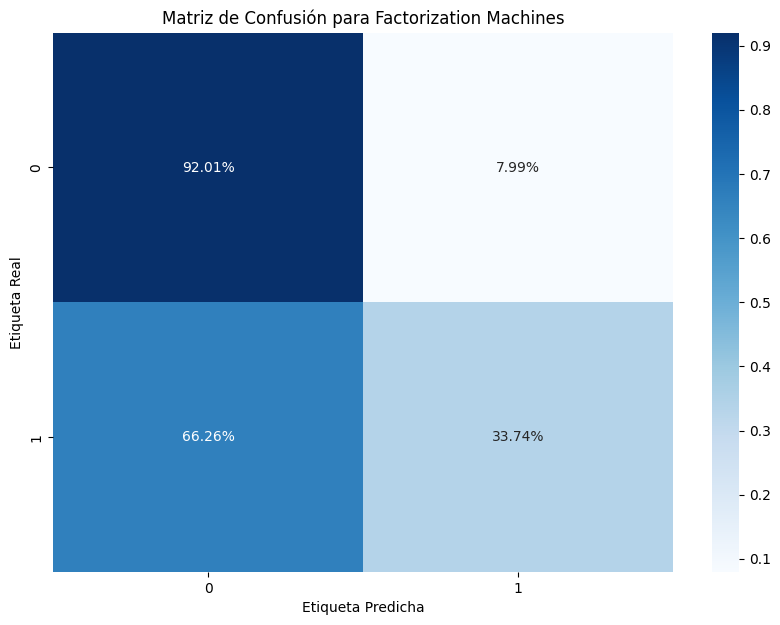

Reporte de Clasificación para Factorization Machines:
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87      5843
         1.0       0.54      0.34      0.42      1657

    accuracy                           0.79      7500
   macro avg       0.69      0.63      0.64      7500
weighted avg       0.77      0.79      0.77      7500

F1-Score para Factorization Machines: 0.7721407484539996



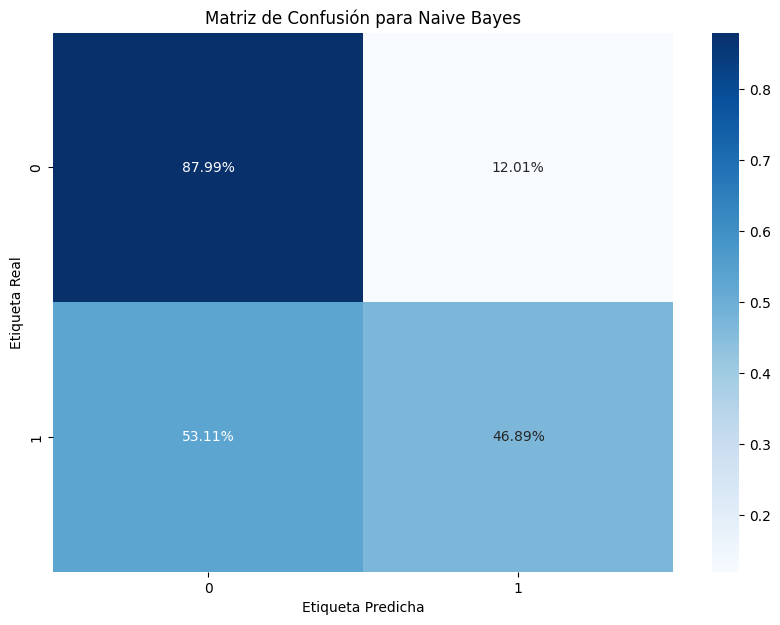

Reporte de Clasificación para Naive Bayes:
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87      5843
         1.0       0.53      0.47      0.50      1657

    accuracy                           0.79      7500
   macro avg       0.69      0.67      0.68      7500
weighted avg       0.78      0.79      0.78      7500

F1-Score para Naive Bayes: 0.7846627127283821



In [ ]:
!pip install pyspark
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.classification import (LogisticRegression, RandomForestClassifier,
                                       MultilayerPerceptronClassifier, LinearSVC, OneVsRest,
                                       NaiveBayes, FMClassifier)
from pyspark.ml.feature import (VectorAssembler, StringIndexer, Imputer, StandardScaler, PCA)
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col, when
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Inicializar SparkSession
spark = SparkSession.builder.appName("default_payment_classification").getOrCreate()

# Cargar datos
url = "https://azuremlexamples.blob.core.windows.net/datasets/credit_card/default_of_credit_card_clients.csv"
credit_df = pd.read_csv(url, header=1, index_col=0)

# Dividir en conjuntos de entrenamiento y prueba
train_df, test_df = train_test_split(credit_df, test_size=0.25)

# Convertir a DataFrames de Spark
train_spark_df = spark.createDataFrame(train_df)
test_spark_df = spark.createDataFrame(test_df)

# Reemplazar valores negativos y manejar valores faltantes
train_spark_df = train_spark_df.select([when(col(c)<0, 0).otherwise(col(c)).alias(c) for c in train_spark_df.columns])
test_spark_df = test_spark_df.select([when(col(c)<0, 0).otherwise(col(c)).alias(c) for c in test_spark_df.columns])
imputer = Imputer(inputCols=train_spark_df.columns, outputCols=train_spark_df.columns)

# Preparar los datos
feature_columns = train_spark_df.columns[:-1]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="assembled_features")
scaler = StandardScaler(inputCol="assembled_features", outputCol="features")
indexer = StringIndexer(inputCol="default payment next month", outputCol="label")

# Aplicar PCA
pca = PCA(k=None, inputCol="features", outputCol="pca_features")  # Corrected inputCol
pca.setK(int(0.95 * len(feature_columns)))

indexer = StringIndexer(inputCol="default payment next month", outputCol="label")

# Definir modelos
lr = LogisticRegression(featuresCol="features", labelCol="label")
rf = RandomForestClassifier(featuresCol="features", labelCol="label")
mlp = MultilayerPerceptronClassifier(layers=[len(feature_columns), 5, 4, 2], featuresCol="features", labelCol="label")
lsvc = LinearSVC(featuresCol="features", labelCol="label")
ovr = OneVsRest(classifier=lsvc, labelCol="label", featuresCol="features")
fm = FMClassifier(featuresCol="features", labelCol="label")
nb = NaiveBayes(featuresCol="features", labelCol="label")

# Crear un Pipeline para cada modelo
models = {
    "Logistic Regression": Pipeline(stages=[imputer, assembler, scaler, pca, indexer, lr]),
    "Random Forest": Pipeline(stages=[imputer, assembler, scaler, pca, indexer, rf]),
    "Multilayer Perceptron": Pipeline(stages=[imputer, assembler, scaler, pca, indexer, mlp]),
    "Linear SVC (One-vs-Rest)": Pipeline(stages=[imputer, assembler, scaler, pca, indexer, ovr]),
    "Factorization Machines": Pipeline(stages=[imputer, assembler, scaler, pca, indexer, fm]),
    "Naive Bayes": Pipeline(stages=[imputer, assembler, scaler, pca, indexer, nb])
}

# Entrenar y evaluar los modelos
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
for name, pipeline in models.items():
    model = pipeline.fit(train_spark_df)  # Use Spark DataFrame
    predictions = model.transform(test_spark_df)  # Use Spark DataFrame
    predictions_pd = predictions.select("label", "prediction").toPandas()


    # Matriz de confusión y Reporte de clasificación
    cm = confusion_matrix(predictions_pd['label'], predictions_pd['prediction'])
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues')
    plt.title(f'Matriz de Confusión para {name}')
    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')
    plt.show()
    print(f"Reporte de Clasificación para {name}:\n{classification_report(predictions_pd['label'], predictions_pd['prediction'])}")

    # F1-Score
    f1_score = evaluator.evaluate(predictions)
    print(f"F1-Score para {name}: {f1_score}\n")

# Detener SparkSession
spark.stop()

## Clustering o agrupamiento

### K-means:

El algoritmo K-means busca dividir un conjunto de datos $X$ en $K$ grupos, donde cada punto $x_i$ pertenece al grupo cuyo centroide $c_k$ es el más cercano:

$$
c_k = \arg\min_{j} \|x_i - c_j\|^2
$$

El objetivo es minimizar la función de costo total $J$, que es la suma de las distancias al cuadrado entre los puntos y los centroides de sus grupos asignados:

$$
J = \sum_{i=1}^{n} \min_{k} \|x_i - c_k\|^2
$$

Los pasos del algoritmo son:

1. **Inicialización**: Inicializar los centroides $c_k$ de forma aleatoria o usando algún otro método.

2. **Asignación**: Asignar cada punto $x_i$ al grupo cuyo centroide $c_k$ sea el más cercano.

3. **Actualización de centroides**: Calcular los nuevos centroides $c_k$ como el promedio de los puntos asignados al grupo $k$.

4. **Repetir**: Repetir los pasos 2 y 3 hasta que los centroides converjan o se alcance un número máximo de iteraciones.

### Bisecting K-means:

El algoritmo Bisecting K-means comienza con un solo grupo que contiene todos los datos y luego divide iterativamente el grupo más grande en dos grupos más pequeños:

1. **Inicialización**: Comenzamos con un grupo $G$ que contiene todos los datos.

2. **Bisecting**: Seleccionamos el grupo más grande $G$ y aplicamos K-means para dividir $G$ en dos grupos $G_1$ y $G_2$.

3. **Criterio de parada**: Repetimos el paso 2 hasta que hayamos formado $K$ grupos o se cumpla algún otro criterio de parada.

### Gaussian Mixture Model (GMM):

El modelo de mezcla gaussiana (GMM) es un modelo probabilístico que asume que los datos en cada grupo son generados por una combinación de distribuciones gaussianas. Dado un conjunto de datos $X$ y un número de grupos $K$, el GMM busca ajustar $K$ distribuciones gaussianas $P(x | \theta_k)$:

$$
P(x | \theta_k) = \frac{1}{(2\pi)^{d/2} |\Sigma_k|^{1/2}} \exp\left(-\frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k)\right)
$$

Donde $d$ es la dimensión de los datos, $\mu_k$ es la media y $\Sigma_k$ es la matriz de covarianza del grupo $k$. El objetivo es encontrar los parámetros $\theta_k$ que maximizan la función de verosimilitud:

$$
L(\theta) = \prod_{i=1}^{n} \sum_{k=1}^{K} P(x_i | \theta_k) P(k)
$$

Donde $P(k)$ es la probabilidad prior del grupo $k$. Para estimar los parámetros, se utiliza el algoritmo Expectation-Maximization (EM):

1. **Expectation (E-step)**: Estimar las probabilidades de pertenencia de los puntos a cada grupo utilizando las distribuciones gaussianas y las probabilidades priors.

2. **Maximization (M-step)**: Estimar los parámetros de las distribuciones gaussianas utilizando los valores estimados en el paso E.

Estos pasos se repiten hasta que los parámetros converjan y la función de verosimilitud se estabilice.

**Silueta o Silhouette**

El coeficiente de Silhouette es una métrica de evaluación de la calidad de los clústeres en un algoritmo de clustering. Mide cuán similar es un punto a su propio grupo en comparación con otros grupos cercanos. El coeficiente de Silhouette se calcula para cada punto $i$ y se denota como $s_i$:

$$
s_i = \frac{b_i - a_i}{\max\{a_i, b_i\}}
$$

Donde:
- $a_i$ es la distancia media al cuadrado entre el punto $i$ y los otros puntos en el mismo grupo (a menor distancia, mejor).
- $b_i$ es la distancia media al cuadrado entre el punto $i$ y los puntos en el grupo más cercano distinto al grupo del punto $i$ (a mayor distancia, mejor).

El coeficiente de Silhouette total para todo el conjunto de datos se calcula como el promedio de los coeficientes individuales $s_i$:

$$
\text{Silhouette} = \frac{1}{n} \sum_{i=1}^{n} s_i
$$

En el contexto de la distancia euclidiana al cuadrado, las fórmulas de $a_i$ y $b_i$ son las siguientes:

- $a_i = \frac{1}{|C_i|} \sum_{j \in C_i} \|x_i - x_j\|^2$
- $b_i = \min_{k \neq c_i} \frac{1}{|C_k|} \sum_{j \in C_k} \|x_i - x_j\|^2$

Donde:
- $x_i$ es el punto $i$ que estamos considerando.
- $C_i$ es el grupo al que pertenece el punto $i$.
- $C_k$ son los grupos distintos al grupo $C_i$.
- $|C_i|$ es el número de puntos en el grupo $C_i$.

## En Python

**Sección 1: Importar bibliotecas**
```python
from pyspark.ml.clustering import KMeans, BisectingKMeans, GaussianMixture
from pyspark.ml.evaluation import ClusteringEvaluator
```
En esta sección, se importan las clases necesarias para trabajar con algoritmos de clustering. Se importan las implementaciones de K-means, Bisecting K-means y Gaussian Mixture Model (GMM) de la librería `pyspark.ml.clustering`. También se importa `ClusteringEvaluator` de `pyspark.ml.evaluation` para evaluar la calidad de los resultados de clustering.

**Sección 2: Definir modelos de clustering**
```python
clustering_models = [
    ("K-means", KMeans(featuresCol='features', k=2)),
    ("Bisecting K-means", BisectingKMeans(featuresCol='features', k=2)),
    ("GMM", GaussianMixture(featuresCol='features', k=2))
]
```
En esta parte, se crea una lista de tuplas llamada `clustering_models`. Cada tupla contiene el nombre del modelo y una instancia del algoritmo de clustering correspondiente. Se definen tres algoritmos: K-means, Bisecting K-means y Gaussian Mixture Model (GMM), cada uno configurado para agrupar los datos en 2 clusters.

**Sección 3: Crear evaluador de clustering**
```python
evaluator = ClusteringEvaluator()
```
Aquí se crea una instancia del evaluador de clustering `ClusteringEvaluator`. Este evaluador se utilizará para calcular la calidad de los resultados del clustering mediante métricas como el coeficiente de silueta.

**Sección 4: Encontrar el mejor modelo de clustering**
```python
best_silhouette = -1.0
best_model_name = ""
for name, model in clustering_models:
    model_fit = model.fit(train_data)
    predictions = model_fit.transform(train_data)
    silhouette = evaluator.evaluate(predictions)
    print(f"Silhouette with squared euclidean distance for {name} = {silhouette}")
    if silhouette > best_silhouette:
        best_silhouette = silhouette
        best_model_name = name
print(f"\nThe best clustering model is: {best_model_name} with Silhouette = {best_silhouette:.2f}")
```
En esta sección, se realiza un bucle `for` que itera a través de los modelos de clustering definidos en `clustering_models`. Para cada modelo, se ajusta el modelo a los datos de entrenamiento usando `model.fit(train_data)` y se realizan predicciones en los mismos datos usando `model_fit.transform(train_data)`.

Se calcula el coeficiente de silueta utilizando el evaluador `evaluator.evaluate(predictions)` y se imprime en la consola. El coeficiente de silueta mide la calidad de los clusters, siendo mayor cuanto más compactos y separados están los clusters.

Luego, se compara el coeficiente de silueta calculado con el mejor valor anterior registrado (`best_silhouette`). Si el coeficiente de silueta actual es mayor, se actualiza `best_silhouette` y `best_model_name` para registrar el modelo con el mejor desempeño.

Al final del bucle, se imprime el nombre del mejor modelo de clustering encontrado y su valor de coeficiente de silueta.

In [ ]:
!pip install pyspark

In [ ]:
from pyspark.ml.clustering import KMeans, BisectingKMeans, GaussianMixture
from pyspark.ml.evaluation import ClusteringEvaluator

from pyspark import SparkContext
sc = SparkContext.getOrCreate()


clustering_models = [
    ("K-means", KMeans(featuresCol='features', k=2)),
    ("Bisecting K-means", BisectingKMeans(featuresCol='features', k=2)),
    ("GMM", GaussianMixture(featuresCol='features', k=2))
]

evaluator = ClusteringEvaluator()

best_silhouette = -1.0
best_model_name = ""

for name, model in clustering_models:
    model_fit = model.fit(train_data)
    predictions = model_fit.transform(train_data)

    silhouette = evaluator.evaluate(predictions)
    print(f"Silhouette with squared euclidean distance for {name} = {silhouette}")

    if silhouette > best_silhouette:
        best_silhouette = silhouette
        best_model_name = name

print(f"\nThe best clustering model is: {best_model_name} with Silhouette = {best_silhouette:.2f}")

sc.stop()


Silhouette with squared euclidean distance for K-means = 0.8383382871446328
Silhouette with squared euclidean distance for Bisecting K-means = 0.8383382871446328
Silhouette with squared euclidean distance for GMM = 0.4536650814610518

The best clustering model is: K-means with Silhouette = 0.84


**Silueta (Silhouette)**: La silueta es una medida de evaluación de la calidad de las agrupaciones en un conjunto de datos. Mide cuán similar es un objeto a su propio grupo (cohesión) en comparación con otros grupos (separación). La puntuación de silueta varía entre -1 y 1, donde un valor alto indica que los objetos están bien agrupados y tienen una buena separación entre los grupos.

- Para el modelo K-means, la silueta es 0.8383382871446328, lo que indica que los puntos están relativamente bien agrupados y separados. Una puntuación de 0.84 es bastante positiva en términos de agrupación.

- Para el modelo Bisecting K-means, la silueta es la misma que en el modelo K-means, es decir, 0.8383382871446328. Esto sugiere que el proceso de partición en sub-clusters no mejoró significativamente la calidad de las agrupaciones en comparación con el K-means estándar.

- Para el modelo GMM, la silueta es 0.27443608734705205, que es mucho menor que las puntuaciones de los modelos K-means. Esto podría indicar que el GMM no logra una buena separación entre los clusters o que los datos no se ajustan bien a las distribuciones gaussianas.

En base a estas puntuaciones de silueta, se concluye que el modelo K-means parece ser la mejor opción, ya que tiene la puntuación de silueta más alta (0.84), lo que sugiere agrupaciones más cohesivas y bien separadas en comparación con los otros modelos.

In [ ]:
import nltk
from pyspark.sql.functions import col, explode
from pyspark.ml.feature import Tokenizer, CountVectorizer, HashingTF, IDF, Word2Vec
from nltk.corpus import gutenberg

# Descargar Moby Dick y cargarlo
nltk.download('gutenberg')
moby_dick_text = gutenberg.raw('melville-moby_dick.txt')
moby_dick_paragraphs = moby_dick_text.split('\n')

# Crear DataFrame con Spark
moby_df = spark.createDataFrame([(t,) for t in moby_dick_paragraphs if t], ["text"])

# Tokenizer
tokenizer = Tokenizer(inputCol="text", outputCol="words")
tokenized = tokenizer.transform(moby_df)

# CountVectorizer
cv = CountVectorizer(inputCol="words", outputCol="count_vector")
cv_model = cv.fit(tokenized)
count_vectorized = cv_model.transform(tokenized)

# TF-IDF
hashing_tf = HashingTF(inputCol="words", outputCol="raw_features", numFeatures=10000)
tf = hashing_tf.transform(tokenized)
idf = IDF(inputCol="raw_features", outputCol="tfidf_vector")
idf_model = idf.fit(tf)
tfidf = idf_model.transform(tf)

# Word2Vec
word2vec = Word2Vec(vectorSize=100, minCount=5, inputCol="words", outputCol="word2vec_vector")
w2v_model = word2vec.fit(tokenized)
word2vec_result = w2v_model.transform(tokenized)

# Mostrar resultados
tokenized.select("words").show()
count_vectorized.select("count_vector").show()
tfidf.select("tfidf_vector").show()
word2vec_result.select("word2vec_vector").show()


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


+--------------------+
|               words|
+--------------------+
|[[moby, dick, by,...|
|                  []|
|                  []|
|        [etymology.]|
|                  []|
|[(supplied, by, a...|
|                  []|
|[the, pale, usher...|
|[now., , he, was,...|
|[handkerchief,, m...|
|[known, nations, ...|
|[somehow, mildly,...|
|                  []|
|["while, you, tak...|
|[name, a, whale-f...|
|[ignorance,, the,...|
|[of, the, word,, ...|
|                  []|
|["whale., ..., sw...|
|[or, rolling;, fo...|
+--------------------+
only showing top 20 rows

+--------------------+
|        count_vector|
+--------------------+
|(31261,[21,551,18...|
|       (31261,[],[])|
|       (31261,[],[])|
|(31261,[20069],[1...|
|       (31261,[],[])|
|(31261,[4,5,21,83...|
|       (31261,[],[])|
|(31261,[0,2,6,10,...|
|(31261,[2,3,4,8,1...|
|(31261,[0,1,12,18...|
|(31261,[0,1,3,5,8...|
|(31261,[1,8,42,62...|
|       (31261,[],[])|
|(31261,[2,5,6,21,...|
|(31261,[4,5,6,15,...|
|(31261,

In [ ]:
!pip install pyspark

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


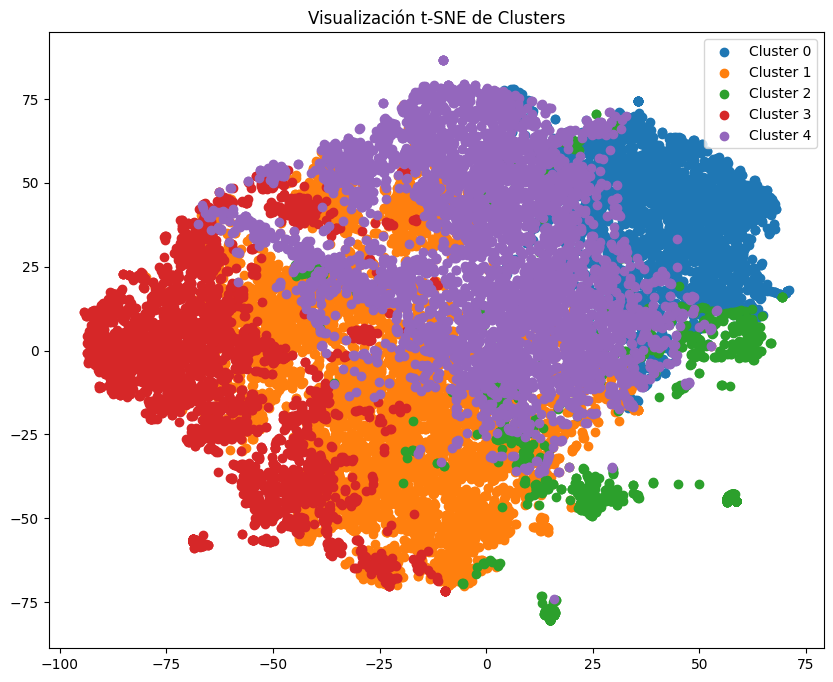

+--------+------------------+
|    word|        similarity|
+--------+------------------+
|   sperm|0.9025006294250488|
|  whale,| 0.853884756565094|
| whale's|0.8404696583747864|
|   white|0.8337037563323975|
|fishery,|0.8018627762794495|
+--------+------------------+

+--------------------+--------------------+--------------------+----------+
|                text|               words|     word2vec_vector|prediction|
+--------------------+--------------------+--------------------+----------+
|A massive white w...|[a, massive, whit...|[-0.0394677971489...|         3|
+--------------------+--------------------+--------------------+----------+



In [ ]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import Tokenizer, Word2Vec
from pyspark.ml.clustering import KMeans
from nltk.corpus import gutenberg
from sklearn.manifold import TSNE

# Iniciar SparkSession
spark = SparkSession.builder.appName("TextClustering").getOrCreate()

# Descargar Moby Dick y cargarlo
try:
    nltk.download('gutenberg')
    moby_dick_text = gutenberg.raw('melville-moby_dick.txt')
    moby_dick_paragraphs = moby_dick_text.split('\n')
except Exception as e:
    print(f"Error al descargar o cargar el texto de Moby Dick: {str(e)}")
    spark.stop()
    exit(1)

# Crear DataFrame con Spark
moby_df = spark.createDataFrame([(t,) for t in moby_dick_paragraphs if t], ["text"])

# Tokenizer
tokenizer = Tokenizer(inputCol="text", outputCol="words")
tokenized = tokenizer.transform(moby_df)

# Word2Vec
word2vec = Word2Vec(vectorSize=100, minCount=5, inputCol="words", outputCol="word2vec_vector")
w2v_model = word2vec.fit(tokenized)
word2vec_result = w2v_model.transform(tokenized)

# K-means clustering
kmeans = KMeans().setK(5).setSeed(42).setFeaturesCol("word2vec_vector")
model = kmeans.fit(word2vec_result)
clustered = model.transform(word2vec_result)

# Visualización usando t-SNE
features = np.array(clustered.select("word2vec_vector").rdd.map(lambda r: r[0]).collect())
labels = np.array(clustered.select("prediction").rdd.map(lambda r: r[0]).collect())

tsne = TSNE(n_components=2, random_state=42)
reduced_features = tsne.fit_transform(features)

# Etiquetas de clusters
cluster_labels = np.unique(labels)

# Visualización con leyenda
plt.figure(figsize=(10, 8))
for cluster_label in cluster_labels:
    plt.scatter(reduced_features[labels == cluster_label, 0], reduced_features[labels == cluster_label, 1], label=f'Cluster {cluster_label}')
plt.legend()
plt.title("Visualización t-SNE de Clusters")
plt.show()

# Ejemplo de búsqueda de palabras similares
similarity_df = w2v_model.findSynonyms("whale", 5)
similarity_df.show()

# Ejemplo de predicción de clusters para un nuevo texto
new_text = ["A massive white whale emerged from the ocean."]

new_text_df = spark.createDataFrame([(new_text[0],)], ["text"])
new_tokenized = tokenizer.transform(new_text_df)
new_word2vec_result = w2v_model.transform(new_tokenized)
prediction = model.transform(new_word2vec_result)
prediction.show()